In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_38361/4159353062.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['GC=F', 'SI=F'], start='2000-01-01')
[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

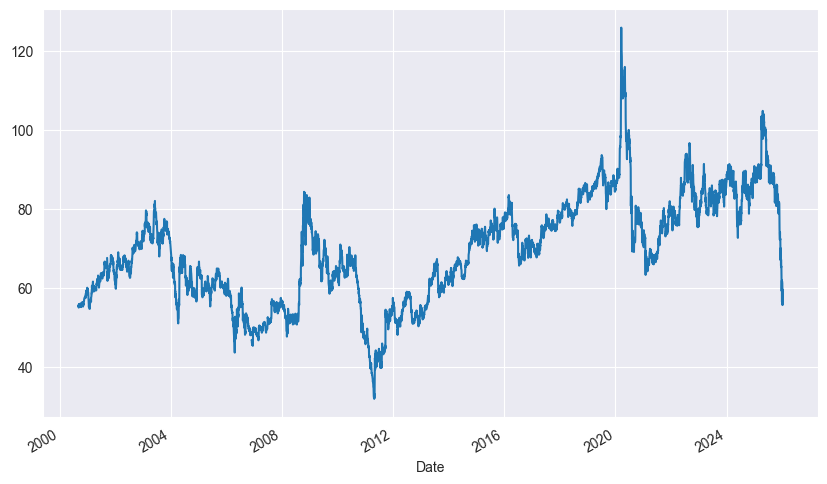

In [3]:
df = yf.download(['GC=F', 'SI=F'], start='2000-01-01')
gold_silver_ratio = df['Close']['GC=F'] / df['Close']['SI=F']
gold_silver_ratio.plot(figsize=(10, 6))

In [4]:
def gold_silver_ratio_analysis(_df, start_date, end_date):
    tmp = _df[(start_date <= _df.index) & (_df.index <= end_date)]
    gold_silver_ratio = tmp['Close']['GC=F'] / tmp['Close']['SI=F']
    
    # # gold silver ratio
    # gold_silver_ratio.plot(figsize=(10, 6))
    # plt.axhline(y=gold_silver_ratio.mean(), color='gray', linestyle='--', alpha=0.7)
    # plt.title('Gold / Silver Ratio')
    # plt.ylabel('Ratio')
    # plt.show()
    
    # # long silver, short gold
    # (tmp['Close']['SI=F'] / tmp['Close']['SI=F'].iloc[0] - tmp['Close']['GC=F'] / tmp['Close']['GC=F'].iloc[0] ).plot(figsize=(10, 6))
    # plt.ylabel('Cumulative Return')
    # plt.title('Long Silver Short Gold')
    # plt.show()
    
    # gold silver cumulative return
    plt.figure(figsize=(10, 6))
    (tmp['Close']['SI=F'] / tmp['Close']['SI=F'].iloc[0] - 1).plot(label='Silver')
    (tmp['Close']['GC=F'] / tmp['Close']['GC=F'].iloc[0] - 1).plot(label='Gold')
    plt.title('Cumulative Return')
    plt.legend()
    plt.show()

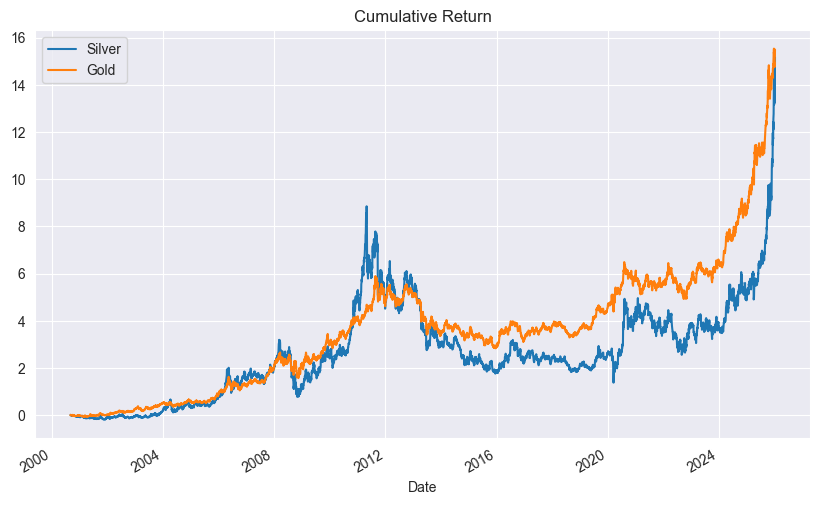

In [5]:
gold_silver_ratio_analysis(df, start_date=df.index[0], end_date=df.index[-1])

In [6]:
data_daily = df['Close'].pct_change().fillna(0).copy()
data_monthly = df['Close'].resample('ME').last().pct_change().fillna(0)

import seaborn as sns

/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_38361/194068915.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_daily = df['Close'].pct_change().fillna(0).copy()


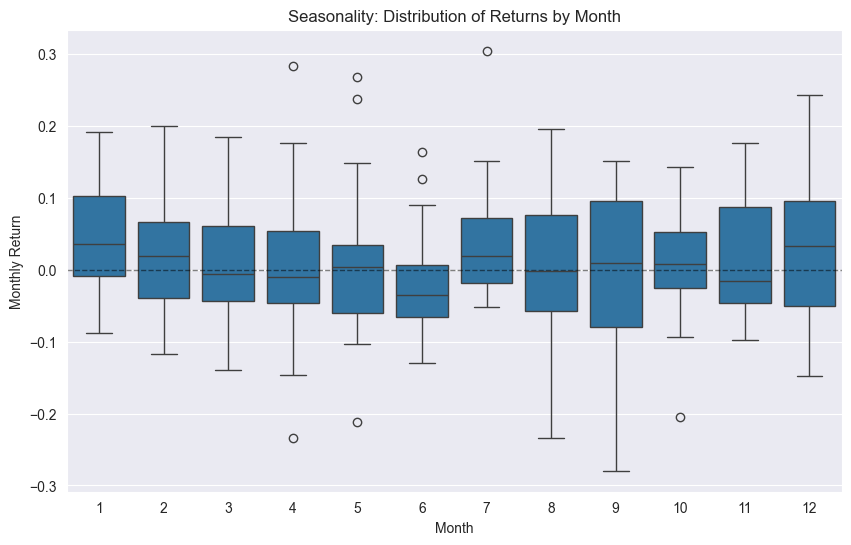

Ticker  SI=F                                                              \
       count      mean       std       min       25%       50%       75%   
Date                                                                       
1       26.0  0.039251  0.071347 -0.088515 -0.008907  0.035562  0.103121   
2       25.0  0.016905  0.080174 -0.117357 -0.039495  0.019588  0.066651   
3       25.0  0.013097  0.087204 -0.139684 -0.043381 -0.006187  0.061333   
4       25.0  0.003735  0.102364 -0.234123 -0.046506 -0.010624  0.054493   
5       25.0  0.009591  0.104738 -0.211613 -0.060287  0.004442  0.034731   
6       25.0 -0.022210  0.073378 -0.129872 -0.065302 -0.034987  0.006849   
7       25.0  0.036350  0.080117 -0.051765 -0.019105  0.018944  0.071658   
8       26.0  0.011243  0.097097 -0.233408 -0.058031 -0.001501  0.076149   
9       26.0 -0.003688  0.108627 -0.279575 -0.079949  0.009147  0.096049   
10      26.0  0.008461  0.072424 -0.204480 -0.026069  0.008415  0.052720   
11      26.0  0.017712  0.082492 -0.097392 -0.046543 -0.016314  0.087293   
12      26.0  0.024244  0.095074 -0.148361 -0.050684  0.033059  0.096263   

Ticker            
             max  
Date              
1       0.192215  
2       0.199830  
3       0.185185  
4       0.282847  
5       0.267777  
6       0.163411  
7       0.304622  
8       0.196054  
9       0.150572  
10      0.143005  
11      0.176105  
12      0.242497

In [7]:
# 2. Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_monthly.index.month, y=data_monthly['SI=F'])

# 3. Add labels and show
plt.title('Seasonality: Distribution of Returns by Month')
plt.xlabel('Month')
plt.ylabel('Monthly Return')
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5) # Optional: Zero line
plt.show()

data_monthly.groupby(data_monthly.index.month)[['SI=F']].describe()

/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_38361/4179092201.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['GC=F', 'SI=F', 'HG=F'], start='2000-01-01').dropna()
[*********************100%***********************]  3 of 3 completed


<Axes: xlabel='Date'>

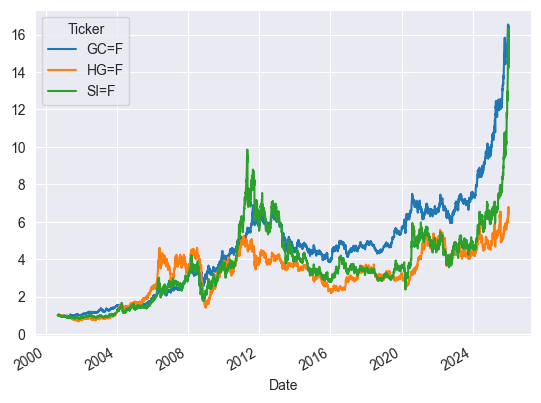

In [8]:
df = yf.download(['GC=F', 'SI=F', 'HG=F'], start='2000-01-01').dropna()
indexed_df = df['Close'] / df['Close'].iloc[0]
indexed_df.plot()

In [9]:
indexed_df.pct_change().corr()

Ticker,GC=F,HG=F,SI=F
Ticker,,,
GC=F,1.000000,0.320534,0.773803
HG=F,0.320534,1.000000,0.420544
SI=F,0.773803,0.420544,1.000000


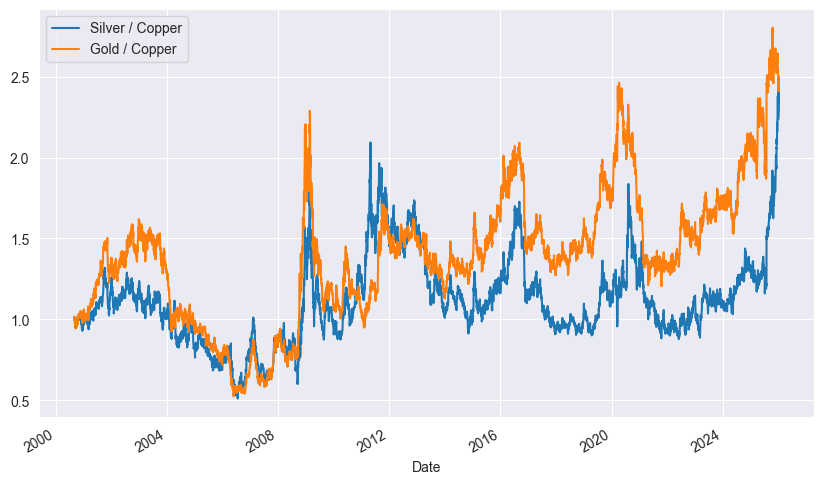

In [10]:
plt.figure(figsize=(10, 6))
(indexed_df['SI=F'] / indexed_df['HG=F']).plot(label='Silver / Copper')
(indexed_df['GC=F'] / indexed_df['HG=F']).plot(label='Gold / Copper')
plt.legend()
plt.show()

Gold bull episodes:
         start        end  n_days
0  2001-10-31 2004-06-29     662
1  2004-08-31 2005-05-27     184
2  2005-06-30 2008-08-29     796
3  2008-12-31 2009-02-27      40
4  2009-04-30 2011-12-30     675
5  2012-01-31 2012-05-30      84
6  2016-05-02 2016-11-29     146
7  2017-05-31 2017-06-29      22
8  2017-11-30 2018-06-29     145
9  2019-07-01 2021-02-26     419
10 2021-06-01 2021-06-29      21
11 2022-02-28 2022-05-27      64
12 2023-03-31 2023-09-29     126
13 2023-10-31 2026-01-09     552

Silver bull episodes:
         start        end  n_days
0  2002-04-30 2002-08-30      86
1  2002-12-31 2003-02-27      40
2  2003-09-02 2004-06-29     205
3  2004-08-02 2005-01-28     124
4  2005-02-28 2005-03-29      21
5  2005-05-02 2005-06-28      41
6  2005-08-01 2005-08-30      22
7  2005-09-30 2007-04-27     393
8  2007-05-31 2007-06-29      22
9  2007-10-01 2008-08-29     232
10 2009-09-30 2011-09-29     505
11 2016-06-30 2016-11-29     104
12 2017-01-31 2017-04-28      6

/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_38361/75065084.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bull_d = bull_m.reindex(price_daily.index, method="ffill").fillna(False).astype(bool)
/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_38361/75065084.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bull_d = bull_m.reindex(price_daily.index, method="ffill").fillna(False).astype(bool)


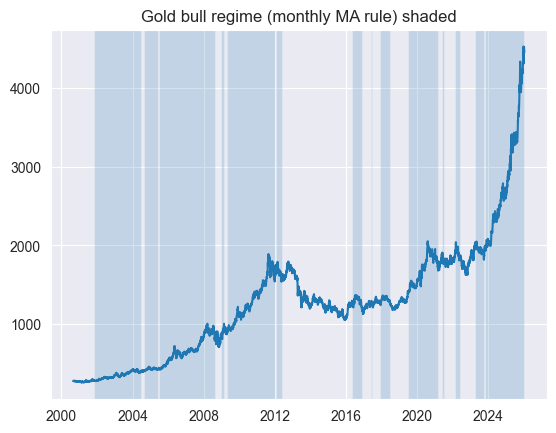

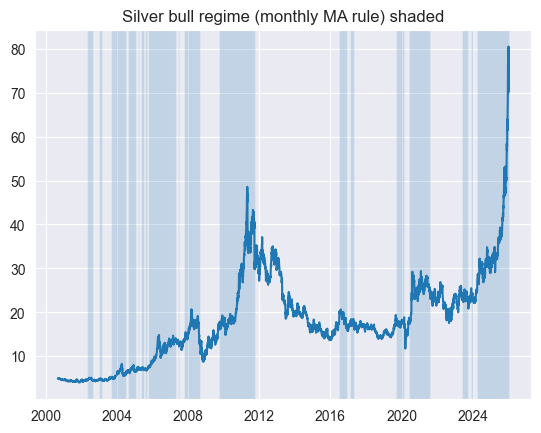


=== Copper vs Gold bull episodes ===
                       n  mean_%  median_%  winrate_%
copper_during_%     14.0   28.64     12.07      64.29
copper_after_21d_%  13.0    1.27     -1.26      46.15
copper_after_63d_%  13.0    3.88      4.15      69.23

=== Copper vs Silver bull episodes ===
                       n  mean_%  median_%  winrate_%
copper_during_%     18.0   17.89      4.78      77.78
copper_after_21d_%  17.0   -0.76     -1.37      47.06
copper_after_63d_%  17.0    2.51      4.15      76.47

Per-episode copper returns (during silver bull):
       n_days  total_%   ann_%
count   18.00    18.00   18.00
mean   157.28    17.89   26.27
std    156.03    29.69   35.02
min     21.00    -6.83  -17.40
25%     40.25     1.34    3.88
50%     95.00     4.78   22.85
75%    225.25    17.50   50.89
max    505.00    95.09  116.64

Copper conditional on Silver bull regime (time-weighted by days):
              in_bull   out_bull
ann_return     0.2684    -0.0159
ann_vol        0.2880     0.

In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# ----------------------------
# Data
# ----------------------------
px = yf.download(["GC=F", "SI=F", "HG=F"], start="2000-01-01",
                 auto_adjust=False, progress=False)["Close"]
px = px.rename(columns={"GC=F":"gold","SI=F":"silver","HG=F":"copper"}).dropna()

# ----------------------------
# Helpers
# ----------------------------
def to_episodes(state: pd.Series, min_len=21):
    """state: boolean Series on daily index. Returns DataFrame of contiguous True blocks."""
    state = state.astype(bool)
    idx = state.index
    on = state.values

    episodes = []
    i = 0
    while i < len(on):
        if on[i]:
            j = i
            while j < len(on) and on[j]:
                j += 1
            start, end = idx[i], idx[j-1]
            n_days = j - i
            if n_days >= min_len:
                episodes.append((start, end, n_days))
            i = j
        else:
            i += 1

    return pd.DataFrame(episodes, columns=["start","end","n_days"])

def plot_with_episodes(series: pd.Series, ep_df: pd.DataFrame, title: str):
    fig, ax = plt.subplots()
    ax.plot(series.index, series.values)
    for _, r in ep_df.iterrows():
        ax.axvspan(r["start"], r["end"], alpha=0.2)
    ax.set_title(title)
    plt.show()

def episode_logret(price: pd.Series, start: pd.Timestamp, end: pd.Timestamp) -> float:
    return float(np.log(price.loc[end] / price.loc[start]))

def fwd_logret(price: pd.Series, anchor: pd.Timestamp, h: int) -> float:
    idx = price.index
    if anchor not in idx:
        return np.nan
    loc = idx.get_loc(anchor)
    if loc + h >= len(idx):
        return np.nan
    return float(np.log(price.iloc[loc+h] / price.iloc[loc]))

def analyze_copper(ep_df: pd.DataFrame, label: str, fwd_horizons=(21,63)):
    rows = []
    for _, r in ep_df.iterrows():
        s, e = r["start"], r["end"]
        row = {
            "start": s, "end": e, "n_days": int(r["n_days"]),
            "copper_during_%": 100*np.expm1(episode_logret(px["copper"], s, e)),
        }
        for h in fwd_horizons:
            row[f"copper_after_{h}d_%"] = 100*np.expm1(fwd_logret(px["copper"], e, h))
        rows.append(row)

    out = pd.DataFrame(rows)
    print(f"\n=== Copper vs {label} bull episodes ===")
    if out.empty:
        print("No episodes found under current definition.")
        return out

    def summ(col):
        x = out[col].dropna()
        return pd.Series({
            "n": len(x),
            "mean_%": x.mean(),
            "median_%": x.median(),
            "winrate_%": 100*(x > 0).mean()
        })

    cols = ["copper_during_%"] + [c for c in out.columns if c.startswith("copper_after_")]
    summary = pd.concat({c: summ(c) for c in cols}, axis=1).T
    print(summary.round(2))
    return out

# ----------------------------
# Monthly bull regime -> daily
# ----------------------------
def monthly_bull_regime(price_daily: pd.Series, ma_months=12, slope_months=3, min_12m_ret=0.0):
    p_m = price_daily.resample("ME").last()

    ma = p_m.rolling(ma_months).mean()
    ma_slope = ma.pct_change(slope_months)               # slope proxy
    r12 = p_m.pct_change(12)                             # 12m return

    bull_m = (p_m > ma) & (ma_slope > 0) & (r12 > min_12m_ret)

    # forward-fill monthly regime back to daily dates
    bull_d = bull_m.reindex(price_daily.index, method="ffill").fillna(False).astype(bool)
    return bull_d, bull_m

# Tune these
bull_gold_d, bull_gold_m = monthly_bull_regime(px["gold"], ma_months=12, slope_months=3, min_12m_ret=0.0)
bull_silver_d, bull_silver_m = monthly_bull_regime(px["silver"], ma_months=12, slope_months=3, min_12m_ret=0.0)

gold_eps = to_episodes(bull_gold_d, min_len=21)     # at least 1 month of *bull regime*
silver_eps = to_episodes(bull_silver_d, min_len=21)

print("Gold bull episodes:\n", gold_eps)
print("\nSilver bull episodes:\n", silver_eps)

plot_with_episodes(px["gold"], gold_eps,   "Gold bull regime (monthly MA rule) shaded")
plot_with_episodes(px["silver"], silver_eps, "Silver bull regime (monthly MA rule) shaded")

analyze_copper(gold_eps, "Gold")
analyze_copper(silver_eps, "Silver")

TRADING_DAYS = 252

def episode_metrics(price: pd.Series, ep_df: pd.DataFrame):
    rows = []
    for _, r in ep_df.iterrows():
        s, e = r["start"], r["end"]
        n = int(r["n_days"])
        if s not in price.index or e not in price.index or n <= 1:
            continue

        total = price.loc[e] / price.loc[s] - 1.0
        ann = (1.0 + total) ** (TRADING_DAYS / n) - 1.0

        rows.append({
            "start": s, "end": e, "n_days": n,
            "total_%": 100*total,
            "ann_%": 100*ann,
        })
    return pd.DataFrame(rows)

ep_copper = episode_metrics(px["copper"], silver_eps)

print("\nPer-episode copper returns (during silver bull):")
print(ep_copper[["n_days","total_%","ann_%"]].describe().round(2))

def ann_stats_from_daily(daily_ret: pd.Series):
    daily_ret = daily_ret.dropna()
    mu = daily_ret.mean()
    vol = daily_ret.std()
    ann_mu = TRADING_DAYS * mu
    ann_vol = np.sqrt(TRADING_DAYS) * vol
    sharpe = ann_mu / ann_vol if ann_vol > 0 else np.nan
    return pd.Series({"ann_return": ann_mu, "ann_vol": ann_vol, "sharpe": sharpe, "n_days": len(daily_ret)})

# If you have the daily bull mask:
# bull_silver_d: boolean Series on daily index
ret_copper = px["copper"].pct_change()

bull_mask = bull_silver_d.reindex(ret_copper.index, fill_value=False).astype(bool)
r_in = ret_copper[bull_mask]
r_out = ret_copper[~bull_mask]

print("\nCopper conditional on Silver bull regime (time-weighted by days):")
print(pd.concat({
    "in_bull": ann_stats_from_daily(r_in),
    "out_bull": ann_stats_from_daily(r_out),
}, axis=1).round(4))


# ----------------------------
# 1) Time-weighted conditional stats for copper
# ----------------------------
ret_copper = px["copper"].pct_change()

bull_mask = bull_gold_d.reindex(ret_copper.index, fill_value=False).astype(bool)

r_in = ret_copper[bull_mask]
r_out = ret_copper[~bull_mask]

print("\nCopper conditional on Gold bull regime (time-weighted by days):")
print(pd.concat({
    "in_bull": ann_stats_from_daily(r_in),
    "out_bull": ann_stats_from_daily(r_out),
}, axis=1).round(4))

# ----------------------------
# 2) (Optional) Per-episode copper distribution during gold bull episodes
# ----------------------------
ep_copper_gold = episode_metrics(px["copper"], gold_eps)

print("\nPer-episode copper returns (during gold bull):")
print(ep_copper_gold[["n_days","total_%","ann_%"]].describe().round(2))


In [14]:
import numpy as np
import pandas as pd

TRADING_DAYS = 252

# ----------------------------
# Stats helpers
# ----------------------------
def ann_stats_from_daily(daily_ret: pd.Series) -> pd.Series:
    daily_ret = daily_ret.dropna()
    mu = daily_ret.mean()
    vol = daily_ret.std(ddof=0)
    ann_mu = TRADING_DAYS * mu
    ann_vol = np.sqrt(TRADING_DAYS) * vol
    sharpe = ann_mu / ann_vol if ann_vol > 0 else np.nan
    return pd.Series({"ann_return": ann_mu, "ann_vol": ann_vol, "sharpe": sharpe, "n_days": len(daily_ret)})

def sharpe_from_daily(daily_ret: pd.Series) -> float:
    s = ann_stats_from_daily(daily_ret)
    return float(s["sharpe"])

# ----------------------------
# A) 4-way regime split
# ----------------------------
ret_copper = px["copper"].pct_change()

gold = bull_gold_d.reindex(ret_copper.index, fill_value=False).astype(bool)
silver = bull_silver_d.reindex(ret_copper.index, fill_value=False).astype(bool)

mask_both = gold & silver
mask_silver_only = silver & (~gold)
mask_gold_only = gold & (~silver)
mask_neither = (~gold) & (~silver)

regimes = {
    "both_bull": mask_both,
    "silver_only": mask_silver_only,
    "gold_only": mask_gold_only,
    "neither": mask_neither,
}

rows = {}
for name, m in regimes.items():
    rows[name] = ann_stats_from_daily(ret_copper[m])

regime_table = pd.DataFrame(rows).T
print("\n=== Copper conditional stats by regime (time-weighted) ===")
print(regime_table.round(4))

# ----------------------------
# B) Robustness tests (Sharpe) for bull masks
# ----------------------------
def segment_lengths(mask: np.ndarray):
    """Return segment values and lengths for a boolean array."""
    vals = []
    lens = []
    n = len(mask)
    i = 0
    while i < n:
        v = mask[i]
        j = i
        while j < n and mask[j] == v:
            j += 1
        vals.append(v)
        lens.append(j - i)
        i = j
    return np.array(vals, dtype=bool), np.array(lens, dtype=int)

def rebuild_from_vals_lens(vals: np.ndarray, lens: np.ndarray) -> np.ndarray:
    out = np.repeat(vals, lens)
    return out

def permute_mask_circular(mask: np.ndarray, rng: np.random.Generator) -> np.ndarray:
    k = int(rng.integers(0, len(mask)))
    return np.roll(mask, k)

def permute_mask_segment_shuffle(mask: np.ndarray, rng: np.random.Generator) -> np.ndarray:
    vals, lens = segment_lengths(mask)
    true_lens = lens[vals]
    false_lens = lens[~vals]
    true_perm = rng.permutation(true_lens) if len(true_lens) > 1 else true_lens
    false_perm = rng.permutation(false_lens) if len(false_lens) > 1 else false_lens

    # Reassign lengths to segments while keeping the True/False alternation pattern
    lens_new = lens.copy()
    ti = 0
    fi = 0
    for i, v in enumerate(vals):
        if v:
            lens_new[i] = true_perm[ti]; ti += 1
        else:
            lens_new[i] = false_perm[fi]; fi += 1

    # Safety: ensure total length unchanged
    if lens_new.sum() != len(mask):
        # In rare edge cases, fall back to circular
        return permute_mask_circular(mask, rng)

    return rebuild_from_vals_lens(vals, lens_new)

def sharpe_robustness_test(daily_ret: pd.Series, mask: pd.Series, B=5000, method="circular", seed=0):
    """
    Returns observed_sharpe, p_value, null_sharpes (np.array)
    p-value is one-sided: P(null >= observed).
    """
    daily_ret = daily_ret.dropna()
    mask = mask.reindex(daily_ret.index, fill_value=False).astype(bool)

    r_in = daily_ret[mask]
    obs = sharpe_from_daily(r_in)

    rng = np.random.default_rng(seed)
    m = mask.values
    null = np.empty(B)

    for b in range(B):
        if method == "circular":
            m_b = permute_mask_circular(m, rng)
        elif method == "segment_shuffle":
            m_b = permute_mask_segment_shuffle(m, rng)
        else:
            raise ValueError("method must be 'circular' or 'segment_shuffle'")

        null[b] = sharpe_from_daily(daily_ret[m_b])

    p = float(np.mean(null >= obs))
    return obs, p, null

tests = {
    "silver_bull": silver,
    "gold_bull": gold,
    "both_bull": mask_both,
}

print("\n=== Robustness (Sharpe) ===")
for name, m in tests.items():
    obs_c, p_c, _ = sharpe_robustness_test(ret_copper, m, B=3000, method="circular", seed=123)
    obs_s, p_s, _ = sharpe_robustness_test(ret_copper, m, B=3000, method="segment_shuffle", seed=456)
    print(f"{name:>10} | observed Sharpe={obs_c:6.3f} | p(circular)={p_c:6.3f} | p(segment_shuffle)={p_s:6.3f}")



=== Copper conditional stats by regime (time-weighted) ===
             ann_return  ann_vol  sharpe  n_days
both_bull        0.2686   0.2910  0.9228  2660.0
silver_only      0.2658   0.2455  1.0827   210.0
gold_only        0.1322   0.2669  0.4953  1295.0
neither         -0.1033   0.2529 -0.4083  2197.0

=== Robustness (Sharpe) ===
silver_bull | observed Sharpe= 0.932 | p(circular)= 0.034 | p(segment_shuffle)= 0.013
 gold_bull | observed Sharpe= 0.790 | p(circular)= 0.012 | p(segment_shuffle)= 0.014
 both_bull | observed Sharpe= 0.923 | p(circular)= 0.035 | p(segment_shuffle)= 0.022


In [15]:
import numpy as np
import pandas as pd

# Assumes px has columns: gold, silver, copper (daily close), already cleaned

# ----------------------------
# 1) Monthly bull regime (consistent definition for all)
# ----------------------------
def monthly_bull_state(price_daily: pd.Series,
                       ma_months=12,
                       slope_months=3,
                       min_12m_ret=0.0):
    """
    Returns:
      p_m: month-end prices
      bull_m: monthly bull state (bool, indexed by month-end)
    """
    p_m = price_daily.resample("ME").last()
    ma = p_m.rolling(ma_months).mean()
    ma_slope = ma.pct_change(slope_months)
    r12 = p_m.pct_change(12)
    bull_m = (p_m > ma) & (ma_slope > 0) & (r12 > min_12m_ret)
    return p_m, bull_m.fillna(False).astype(bool)

def bull_episodes_from_monthly(bull_m: pd.Series, min_months=1):
    """Contiguous True blocks on monthly index."""
    idx = bull_m.index
    x = bull_m.values
    eps = []
    i = 0
    while i < len(x):
        if x[i]:
            j = i
            while j < len(x) and x[j]:
                j += 1
            start = idx[i]
            end = idx[j-1]
            n = j - i
            if n >= min_months:
                eps.append((start, end, n))
            i = j
        else:
            i += 1
    return pd.DataFrame(eps, columns=["start","end","n_months"])

# Choose your regime parameters (keep consistent across metals)
MA_M = 12
SLOPE_M = 3
MIN_12M_RET = 0.00   # optionally tighten to 0.10 for “strong bull”

p_g, bull_g = monthly_bull_state(px["gold"],   MA_M, SLOPE_M, MIN_12M_RET)
p_s, bull_s = monthly_bull_state(px["silver"], MA_M, SLOPE_M, MIN_12M_RET)
p_c, bull_c = monthly_bull_state(px["copper"], MA_M, SLOPE_M, MIN_12M_RET)

eps_g = bull_episodes_from_monthly(bull_g, min_months=1)
eps_s = bull_episodes_from_monthly(bull_s, min_months=1)
eps_c = bull_episodes_from_monthly(bull_c, min_months=1)

print("Copper bull episodes (monthly):")
print(eps_c)

# ----------------------------
# 2) Lead-lag: after event, does copper enter bull within H months?
# ----------------------------
def first_entry_delay(after_date: pd.Timestamp, target_bull: pd.Series, H: int):
    """
    Returns smallest k in [0..H] such that target_bull at after_date+k months is True.
    If never enters within horizon -> NaN.
    """
    # ensure monthly index alignment
    idx = target_bull.index
    if after_date not in idx:
        return np.nan

    loc = idx.get_loc(after_date)
    for k in range(0, H+1):
        if loc + k >= len(idx):
            break
        if bool(target_bull.iloc[loc + k]):
            return k
    return np.nan

def event_to_copper_entry(eps_src: pd.DataFrame, bull_target: pd.Series, H=12, anchor="start"):
    """
    anchor: "start" or "end" of source episode (gold/silver bull episode)
    returns DataFrame of delays and whether entry happened within H.
    """
    dates = eps_src[anchor].values
    delays = []
    for d in dates:
        d = pd.Timestamp(d)
        # from the event month itself (anchor month) forward
        delay = first_entry_delay(d, bull_target, H=H)
        delays.append(delay)

    out = pd.DataFrame({
        "event_date": pd.to_datetime(dates),
        "delay_months": delays,
        "entered_within_H": [pd.notna(x) for x in delays],
    })
    return out

H = 12  # horizon in months

gold_start_to_c = event_to_copper_entry(eps_g, bull_c, H=H, anchor="start")
gold_end_to_c   = event_to_copper_entry(eps_g, bull_c, H=H, anchor="end")

silver_start_to_c = event_to_copper_entry(eps_s, bull_c, H=H, anchor="start")
silver_end_to_c   = event_to_copper_entry(eps_s, bull_c, H=H, anchor="end")

def summarize_delays(df: pd.DataFrame, label: str):
    hit = df["entered_within_H"].mean()
    d = df["delay_months"].dropna()
    print(f"\n=== {label} (H={H} months) ===")
    print(f"P(copper enters bull within H): {hit:.2%} | events={len(df)}")
    if len(d) > 0:
        print(f"Delay (months): median={d.median():.0f}, mean={d.mean():.2f}, "
              f"p25={d.quantile(0.25):.0f}, p75={d.quantile(0.75):.0f}")

summarize_delays(gold_start_to_c, "After GOLD bull START")
summarize_delays(gold_end_to_c,   "After GOLD bull END")
summarize_delays(silver_start_to_c, "After SILVER bull START")
summarize_delays(silver_end_to_c,   "After SILVER bull END")

# ----------------------------
# 3) Cumulative incidence curve: P(entry by k months)
# ----------------------------
def incidence_curve(df: pd.DataFrame, H: int):
    d = df["delay_months"]
    out = []
    for k in range(H+1):
        out.append(np.mean((d.notna()) & (d <= k)))
    return pd.Series(out, index=range(H+1))

curves = pd.DataFrame({
    "gold_start": incidence_curve(gold_start_to_c, H),
    "gold_end":   incidence_curve(gold_end_to_c, H),
    "silver_start": incidence_curve(silver_start_to_c, H),
    "silver_end":   incidence_curve(silver_end_to_c, H),
})

print("\nCumulative probability copper is in bull by k months after event:")
print((100*curves).round(1))  # in %


Copper bull episodes (monthly):
        start        end  n_months
0  2002-06-30 2002-06-30         1
1  2002-11-30 2002-11-30         1
2  2003-01-31 2003-02-28         2
3  2003-07-31 2006-11-30        41
4  2007-04-30 2007-04-30         1
5  2007-09-30 2007-10-31         2
6  2008-02-29 2008-07-31         6
7  2009-10-31 2010-05-31         8
8  2010-07-31 2011-08-31        14
9  2012-11-30 2012-12-31         2
10 2014-07-31 2014-07-31         1
11 2016-11-30 2018-05-31        19
12 2020-08-31 2021-12-31        17
13 2022-02-28 2022-03-31         2
14 2023-12-31 2023-12-31         1
15 2024-04-30 2024-10-31         7
16 2025-01-31 2025-03-31         3
17 2025-05-31 2025-06-30         2
18 2025-08-31 2026-01-31         6

=== After GOLD bull START (H=12 months) ===
P(copper enters bull within H): 93.33% | events=15
Delay (months): median=4, mean=4.50, p25=0, p75=9

=== After GOLD bull END (H=12 months) ===
P(copper enters bull within H): 93.33% | events=15
Delay (months): median=0, me

In [17]:
import numpy as np
import pandas as pd

# You already have these from earlier:
# bull_g (monthly bool), bull_s (monthly bool), bull_c (monthly bool)
# eps_g, eps_s (episodes), and summarize_delays(), event_to_copper_entry()

def tag_episode_age(bull_m: pd.Series) -> pd.Series:
    """For each month, if bull=True, age_months = 1,2,3.. within that bull run; else 0."""
    bull_m = bull_m.fillna(False).astype(bool)
    age = np.zeros(len(bull_m), dtype=int)
    run = 0
    for i, v in enumerate(bull_m.values):
        if v:
            run += 1
            age[i] = run
        else:
            run = 0
            age[i] = 0
    return pd.Series(age, index=bull_m.index, name="age")

def bull_episodes_from_monthly(bull_m: pd.Series, min_months=1):
    idx = bull_m.index
    x = bull_m.values
    eps = []
    i = 0
    while i < len(x):
        if x[i]:
            j = i
            while j < len(x) and x[j]:
                j += 1
            start = idx[i]
            end = idx[j-1]
            n = j - i
            if n >= min_months:
                eps.append((start, end, n))
            i = j
        else:
            i += 1
    return pd.DataFrame(eps, columns=["start","end","n_months"])

def first_entry_delay(after_date: pd.Timestamp, target_bull: pd.Series, H: int):
    idx = target_bull.index
    if after_date not in idx:
        return np.nan
    loc = idx.get_loc(after_date)
    for k in range(0, H+1):
        if loc + k >= len(idx):
            break
        if bool(target_bull.iloc[loc + k]):
            return k
    return np.nan

def event_to_copper_entry(eps_src: pd.DataFrame, bull_target: pd.Series, H=12, anchor="start"):
    dates = eps_src[anchor].values
    delays = []
    for d in dates:
        d = pd.Timestamp(d)
        delays.append(first_entry_delay(d, bull_target, H=H))
    out = pd.DataFrame({
        "event_date": pd.to_datetime(dates),
        "delay_months": delays,
        "entered_within_H": [pd.notna(x) for x in delays],
    })
    return out

def event_to_entry_condition_on_not_in_bull(eps_src, bull_target, H=12, anchor="start"):
    out = event_to_copper_entry(eps_src, bull_target, H=H, anchor=anchor)
    # keep only events where copper is NOT already bull at event month
    is_bull_at_event = bull_target.reindex(out["event_date"]).fillna(False).astype(bool).values
    out = out.loc[~is_bull_at_event].copy()
    out["entered_within_H"] = out["delay_months"].notna()
    return out

# ----------------------------
# Build late-stage episodes
# ----------------------------
AGE_CUTOFF = 6  # "late-stage" means at least 6 months into the bull run (changeable)

age_gold = tag_episode_age(bull_g)
age_silver = tag_episode_age(bull_s)

late_gold = bull_g & (age_gold >= AGE_CUTOFF)
late_silver = bull_s & (age_silver >= AGE_CUTOFF)

eps_late_gold = bull_episodes_from_monthly(late_gold, min_months=1)
eps_late_silver = bull_episodes_from_monthly(late_silver, min_months=1)

print("Late-stage GOLD bull episodes:\n", eps_late_gold)
print("\nLate-stage SILVER bull episodes:\n", eps_late_silver)

# ----------------------------
# Catch-up analysis (only when copper is not already bull at t0)
# ----------------------------
H = 12

late_gold_to_c_catchup = event_to_entry_condition_on_not_in_bull(eps_late_gold, bull_c, H=H, anchor="start")
late_silver_to_c_catchup = event_to_entry_condition_on_not_in_bull(eps_late_silver, bull_c, H=H, anchor="start")

summarize_delays(late_gold_to_c_catchup, f"CATCH-UP: After LATE-STAGE GOLD bull (age>={AGE_CUTOFF}m) starts")
summarize_delays(late_silver_to_c_catchup, f"CATCH-UP: After LATE-STAGE SILVER bull (age>={AGE_CUTOFF}m) starts")


Late-stage GOLD bull episodes:
        start        end  n_months
0 2002-03-31 2004-05-31        27
1 2005-01-31 2005-04-30         4
2 2005-11-30 2008-07-31        33
3 2009-09-30 2011-11-30        27
4 2016-09-30 2016-10-31         2
5 2018-04-30 2018-05-31         2
6 2019-11-30 2021-01-31        15
7 2023-08-31 2023-08-31         1
8 2024-03-31 2026-01-31        23

Late-stage SILVER bull episodes:
        start        end  n_months
0 2004-01-31 2004-05-31         5
1 2004-12-31 2004-12-31         1
2 2006-02-28 2007-03-31        14
3 2008-02-29 2008-07-31         6
4 2010-02-28 2011-08-31        19
5 2020-01-31 2020-01-31         1
6 2020-10-31 2021-06-30         9
7 2024-08-31 2026-01-31        18

=== CATCH-UP: After LATE-STAGE GOLD bull (age>=6m) starts (H=12 months) ===
P(copper enters bull within H): 100.00% | events=6
Delay (months): median=2, mean=3.33, p25=1, p75=4

=== CATCH-UP: After LATE-STAGE SILVER bull (age>=6m) starts (H=12 months) ===
P(copper enters bull within H)

In [18]:
import numpy as np
import pandas as pd

# Assumes you already have monthly bull states:
# bull_g, bull_s, bull_c  (monthly bool Series indexed by month-end)
# and summarize_delays() defined earlier.

# ----------------------------
# Helpers
# ----------------------------
def tag_episode_age(bull_m: pd.Series) -> pd.Series:
    bull_m = bull_m.fillna(False).astype(bool)
    age = np.zeros(len(bull_m), dtype=int)
    run = 0
    for i, v in enumerate(bull_m.values):
        if v:
            run += 1
            age[i] = run
        else:
            run = 0
            age[i] = 0
    return pd.Series(age, index=bull_m.index, name="age")

def bull_episodes_from_monthly(bull_m: pd.Series, min_months=1) -> pd.DataFrame:
    idx = bull_m.index
    x = bull_m.fillna(False).astype(bool).values
    eps = []
    i = 0
    while i < len(x):
        if x[i]:
            j = i
            while j < len(x) and x[j]:
                j += 1
            start = idx[i]
            end = idx[j-1]
            n = j - i
            if n >= min_months:
                eps.append((start, end, n))
            i = j
        else:
            i += 1
    return pd.DataFrame(eps, columns=["start", "end", "n_months"])

def first_entry_delay(after_date: pd.Timestamp, target_bull: pd.Series, H: int):
    idx = target_bull.index
    if after_date not in idx:
        return np.nan
    loc = idx.get_loc(after_date)
    for k in range(0, H + 1):
        if loc + k >= len(idx):
            break
        if bool(target_bull.iloc[loc + k]):
            return k
    return np.nan

def event_to_copper_entry(eps_src: pd.DataFrame, bull_target: pd.Series, H=12, anchor="start") -> pd.DataFrame:
    dates = pd.to_datetime(eps_src[anchor].values)
    delays = []
    for d in dates:
        delays.append(first_entry_delay(pd.Timestamp(d), bull_target, H=H))
    out = pd.DataFrame({
        "event_date": dates,
        "delay_months": delays,
        "entered_within_H": [pd.notna(x) for x in delays],
    })
    return out

def event_to_entry_condition_on_not_in_bull(eps_src: pd.DataFrame, bull_target: pd.Series, H=12, anchor="start"):
    out = event_to_copper_entry(eps_src, bull_target, H=H, anchor=anchor)
    # Only keep events where copper is NOT bull at event_date (true "catch-up" set)
    is_bull_at_event = bull_target.reindex(out["event_date"]).fillna(False).astype(bool).values
    out = out.loc[~is_bull_at_event].copy()
    out["entered_within_H"] = out["delay_months"].notna()
    return out

def incidence_curve(delays: pd.Series, H: int) -> pd.Series:
    # cumulative probability of entering by month k
    out = []
    for k in range(H + 1):
        out.append(np.mean(delays.notna() & (delays <= k)))
    return pd.Series(out, index=range(H + 1))

# ----------------------------
# Parameter sweep
# ----------------------------
AGE_CUTOFFS = [4, 6, 9, 12]   # "late-stage" threshold in months
HORIZONS = [6, 9, 12]         # entry horizon in months
MIN_LATE_EP_LEN = 3           # require late-stage episode length >= 3 months

age_gold = tag_episode_age(bull_g)
age_silver = tag_episode_age(bull_s)

rows = []
curves_store = {}  # optional: store incidence curves

for age_cut in AGE_CUTOFFS:
    late_gold = bull_g & (age_gold >= age_cut)
    late_silver = bull_s & (age_silver >= age_cut)

    eps_late_gold = bull_episodes_from_monthly(late_gold, min_months=MIN_LATE_EP_LEN)
    eps_late_silver = bull_episodes_from_monthly(late_silver, min_months=MIN_LATE_EP_LEN)

    for H in HORIZONS:
        # Catch-up sets (copper not bull at t0)
        cg = event_to_entry_condition_on_not_in_bull(eps_late_gold, bull_c, H=H, anchor="start")
        cs = event_to_entry_condition_on_not_in_bull(eps_late_silver, bull_c, H=H, anchor="start")

        for metal, df in [("gold", cg), ("silver", cs)]:
            n_events = len(df)
            p_hit = df["entered_within_H"].mean() if n_events > 0 else np.nan
            d = df["delay_months"].dropna()
            rows.append({
                "metal": metal,
                "age_cutoff_m": age_cut,
                "H_m": H,
                "late_eps": len(eps_late_gold) if metal == "gold" else len(eps_late_silver),
                "catchup_events": n_events,
                "p_enter_within_H": p_hit,
                "delay_median": d.median() if len(d) else np.nan,
                "delay_mean": d.mean() if len(d) else np.nan,
                "delay_p25": d.quantile(0.25) if len(d) else np.nan,
                "delay_p75": d.quantile(0.75) if len(d) else np.nan,
            })

            # Store incidence curve for the most relevant horizon (optional)
            # Here we store for H=12 only
            if H == 12 and n_events > 0:
                curves_store[(metal, age_cut)] = incidence_curve(df["delay_months"], H)

grid = pd.DataFrame(rows).sort_values(["metal", "age_cutoff_m", "H_m"]).reset_index(drop=True)

# Pretty print
grid_show = grid.copy()
grid_show["p_enter_within_H"] = (100 * grid_show["p_enter_within_H"]).round(1)
for c in ["delay_median","delay_mean","delay_p25","delay_p75"]:
    grid_show[c] = grid_show[c].round(2)

print("\n=== Late-stage catch-up grid (conditioned on copper NOT bull at t0) ===")
print(grid_show)

# Optional: show incidence curves (k=0..12) for each age_cutoff (if any exist)
if curves_store:
    inc = pd.DataFrame({f"{m}_age{a}": (100 * s) for (m,a), s in curves_store.items()})
    inc.index.name = "k_months"
    print("\n=== Cumulative probability of copper entering bull by k months (H=12) ===")
    print(inc.round(1))
else:
    print("\n(No incidence curves stored: no catch-up events for H=12 under these settings.)")



=== Late-stage catch-up grid (conditioned on copper NOT bull at t0) ===
     metal  age_cutoff_m  H_m  late_eps  catchup_events  p_enter_within_H  \
0     gold             4    6         9               6              83.3   
1     gold             4    9         9               6              83.3   
2     gold             4   12         9               6             100.0   
3     gold             6    6         6               4              75.0   
4     gold             6    9         6               4             100.0   
5     gold             6   12         6               4             100.0   
6     gold             9    6         5               1             100.0   
7     gold             9    9         5               1             100.0   
8     gold             9   12         5               1             100.0   
9     gold            12    6         5               2             100.0   
10    gold            12    9         5               2             100.0   
11 

In [19]:
import numpy as np
import pandas as pd

# Assumes you already have:
# px: daily prices with columns ["gold","silver","copper"]
# bull_g, bull_s, bull_c: monthly boolean bull states on month-end index (from monthly_bull_state)
# (Optional) if not, you can rebuild them with your monthly_bull_state function.

# ----------------------------
# Helpers
# ----------------------------
def tag_episode_age(bull_m: pd.Series) -> pd.Series:
    bull_m = bull_m.fillna(False).astype(bool)
    age = np.zeros(len(bull_m), dtype=int)
    run = 0
    for i, v in enumerate(bull_m.values):
        if v:
            run += 1
            age[i] = run
        else:
            run = 0
            age[i] = 0
    return pd.Series(age, index=bull_m.index, name="age")

def fwd_logret(price_m: pd.Series, H: int) -> pd.Series:
    # log return from t -> t+H months
    return np.log(price_m.shift(-H) / price_m)

def forward_max_drawdown(price_m: pd.Series, H: int) -> pd.Series:
    """
    Forward max drawdown over next H months using month-end prices.
    Returns a negative number (e.g., -0.12 for -12%).
    """
    out = pd.Series(index=price_m.index, dtype=float)
    vals = price_m.values
    for i in range(len(price_m)):
        j = i + H
        if j >= len(price_m):
            out.iloc[i] = np.nan
            continue
        window = vals[i:j+1]
        peak = np.maximum.accumulate(window)
        dd = window / peak - 1.0
        out.iloc[i] = dd.min()
    return out

def summarize_forward(df: pd.DataFrame, label: str, H: int):
    """
    df has columns: fwd_ret, remain_bull, fwd_mdd (optional)
    """
    x = df["fwd_ret"].dropna()
    if len(x) == 0:
        return pd.Series({"n": 0})

    out = {
        "n": len(x),
        "mean_%": 100*np.expm1(x.mean()),
        "median_%": 100*np.expm1(x.median()),
        "winrate_%": 100*(x > 0).mean(),
        "p_remain_bull_%": 100*df["remain_bull"].dropna().mean() if "remain_bull" in df else np.nan,
    }
    if "fwd_mdd" in df:
        mdd = df["fwd_mdd"].dropna()
        if len(mdd):
            out["avg_fwd_MDD_%"] = 100*mdd.mean()          # negative
            out["p_MDD<-10%_%"] = 100*(mdd <= -0.10).mean()
            out["p_MDD<-15%_%"] = 100*(mdd <= -0.15).mean()

    return pd.Series(out)

def make_condition_table(price_m, bull_c, bull_g, bull_s,
                         age_c=None, age_g=None, age_s=None,
                         H_list=(1,3,6,12),
                         late_s=6, late_g=6, late_c=6,
                         non_overlapping=True,
                         include_mdd=True):
    """
    Returns a multi-index table: (condition, H) -> summary stats
    """
    idx = price_m.index

    # Base masks at time t
    c = bull_c.reindex(idx).fillna(False).astype(bool)
    g = bull_g.reindex(idx).fillna(False).astype(bool)
    s = bull_s.reindex(idx).fillna(False).astype(bool)

    if age_c is None: age_c = tag_episode_age(bull_c)
    if age_g is None: age_g = tag_episode_age(bull_g)
    if age_s is None: age_s = tag_episode_age(bull_s)

    ac = age_c.reindex(idx).fillna(0).astype(int)
    ag = age_g.reindex(idx).fillna(0).astype(int)
    ase = age_s.reindex(idx).fillna(0).astype(int)

    # Conditions at month t (continuation means we always require copper bull at t)
    conds = {
        "C_bull": c,
        "C_bull & S_bull": c & s,
        "C_bull & G_bull": c & g,
        "C_bull & both(G,S)_bull": c & g & s,

        f"C_bull & S_bull_age>={late_s}": c & s & (ase >= late_s),
        f"C_bull & G_bull_age>={late_g}": c & g & (ag  >= late_g),
        f"C_bull_age>={late_c}": c & (ac >= late_c),
        f"C_bull_age>={late_c} & both_bull": c & (ac >= late_c) & g & s,
    }

    rows = []
    for H in H_list:
        fwd = fwd_logret(price_m, H)
        remain = bull_c.shift(-H)  # whether copper is still bull at t+H
        remain = remain.reindex(idx).astype("boolean")

        mdd = forward_max_drawdown(price_m, H) if include_mdd else None

        # To reduce overlap bias, sample every H months (non-overlapping forward windows)
        sample_mask = pd.Series(True, index=idx)
        if non_overlapping and H > 1:
            sample_mask.iloc[:] = False
            sample_mask.iloc[::H] = True

        for name, m in conds.items():
            sel = m & sample_mask

            d = pd.DataFrame({
                "fwd_ret": fwd.where(sel),
                "remain_bull": remain.where(sel).astype(float),  # True->1.0, False->0.0, NaN stays NaN
            }, index=idx)

            if include_mdd:
                d["fwd_mdd"] = mdd.where(sel)

            summ = summarize_forward(d, name, H)
            summ["condition"] = name
            summ["H_months"] = H
            rows.append(summ)

    out = pd.DataFrame(rows).set_index(["condition","H_months"]).sort_index()
    return out

# ----------------------------
# Build month-end copper price series aligned to your bull_* indices
# ----------------------------
copper_m = px["copper"].resample("ME").last().dropna()
# Make sure bull_* are aligned to month-end index
common_idx = copper_m.index.intersection(bull_c.index).intersection(bull_g.index).intersection(bull_s.index)
copper_m = copper_m.reindex(common_idx)

bull_c_m = bull_c.reindex(common_idx).fillna(False).astype(bool)
bull_g_m = bull_g.reindex(common_idx).fillna(False).astype(bool)
bull_s_m = bull_s.reindex(common_idx).fillna(False).astype(bool)

age_c = tag_episode_age(bull_c_m)
age_g = tag_episode_age(bull_g_m)
age_s = tag_episode_age(bull_s_m)

# ----------------------------
# Run continuation analysis
# ----------------------------
H_LIST = (1,3,6,12)          # months ahead
LATE_S = 6                   # "late-stage" = 6 months into silver bull
LATE_G = 6
LATE_C = 6
NON_OVERLAP = True           # recommended for cleaner inference
INCLUDE_MDD = True           # include forward max drawdown metrics

tbl = make_condition_table(
    copper_m, bull_c_m, bull_g_m, bull_s_m,
    age_c=age_c, age_g=age_g, age_s=age_s,
    H_list=H_LIST,
    late_s=LATE_S, late_g=LATE_G, late_c=LATE_C,
    non_overlapping=NON_OVERLAP,
    include_mdd=INCLUDE_MDD
)

# Pretty print
tbl_show = tbl.copy()
for col in ["mean_%","median_%","winrate_%","p_remain_bull_%","avg_fwd_MDD_%","p_MDD<-10%_%","p_MDD<-15%_%"]:
    if col in tbl_show.columns:
        tbl_show[col] = tbl_show[col].round(2)
print("\n=== Copper continuation: forward returns conditional on regimes at t (monthly) ===")
print(tbl_show)



=== Copper continuation: forward returns conditional on regimes at t (monthly) ===
                                        n  mean_%  median_%  winrate_%  \
condition                 H_months                                       
C_bull                    1         135.0    0.90      0.50      55.56   
                          3          46.0    3.58      0.49      56.52   
                          6          22.0    7.18      3.22      68.18   
                          12         10.0   16.83     16.53      60.00   
C_bull & G_bull           1         108.0    0.81      0.58      57.41   
                          3          38.0    3.76      0.49      57.89   
                          6          18.0    7.51      3.22      61.11   
                          12          8.0   27.13     28.39      75.00   
C_bull & G_bull_age>=6    1          88.0    0.56      0.48      55.68   
                          3          30.0    3.26      0.33      56.67   
                          6 

In [23]:
print(bull_c.tail(20))
print(age_c.tail(20))
print(bull_s.tail(20))
print(age_s.tail(20))
print(bull_g.tail(20))
print(age_g.tail(20))

Date
2024-06-30     True
2024-07-31     True
2024-08-31     True
2024-09-30     True
2024-10-31     True
2024-11-30    False
2024-12-31    False
2025-01-31     True
2025-02-28     True
2025-03-31     True
2025-04-30    False
2025-05-31     True
2025-06-30     True
2025-07-31    False
2025-08-31     True
2025-09-30     True
2025-10-31     True
2025-11-30     True
2025-12-31     True
2026-01-31     True
Freq: ME, Name: copper, dtype: bool
Date
2024-06-30    3
2024-07-31    4
2024-08-31    5
2024-09-30    6
2024-10-31    7
2024-11-30    0
2024-12-31    0
2025-01-31    1
2025-02-28    2
2025-03-31    3
2025-04-30    0
2025-05-31    1
2025-06-30    2
2025-07-31    0
2025-08-31    1
2025-09-30    2
2025-10-31    3
2025-11-30    4
2025-12-31    5
2026-01-31    6
Freq: ME, Name: age, dtype: int64
Date
2024-06-30    True
2024-07-31    True
2024-08-31    True
2024-09-30    True
2024-10-31    True
2024-11-30    True
2024-12-31    True
2025-01-31    True
2025-02-28    True
2025-03-31    True
2025-

## Gold Silver Ratio

In [91]:
# import numpy as np
# import pandas as pd
# import yfinance as yf
# import matplotlib.pyplot as plt

START = "2000-01-01"
GOLD = "GC=F"
SILV = "SI=F"

# ----------------------------
# 1) Download & build ratio
# ----------------------------
px = yf.download([GOLD, SILV], start=START, auto_adjust=False, progress=False)["Close"]
px = px.dropna()  # align dates

px.columns = ["gold", "silver"]
ratio = (px["gold"] / px["silver"]).rename("gs_ratio")

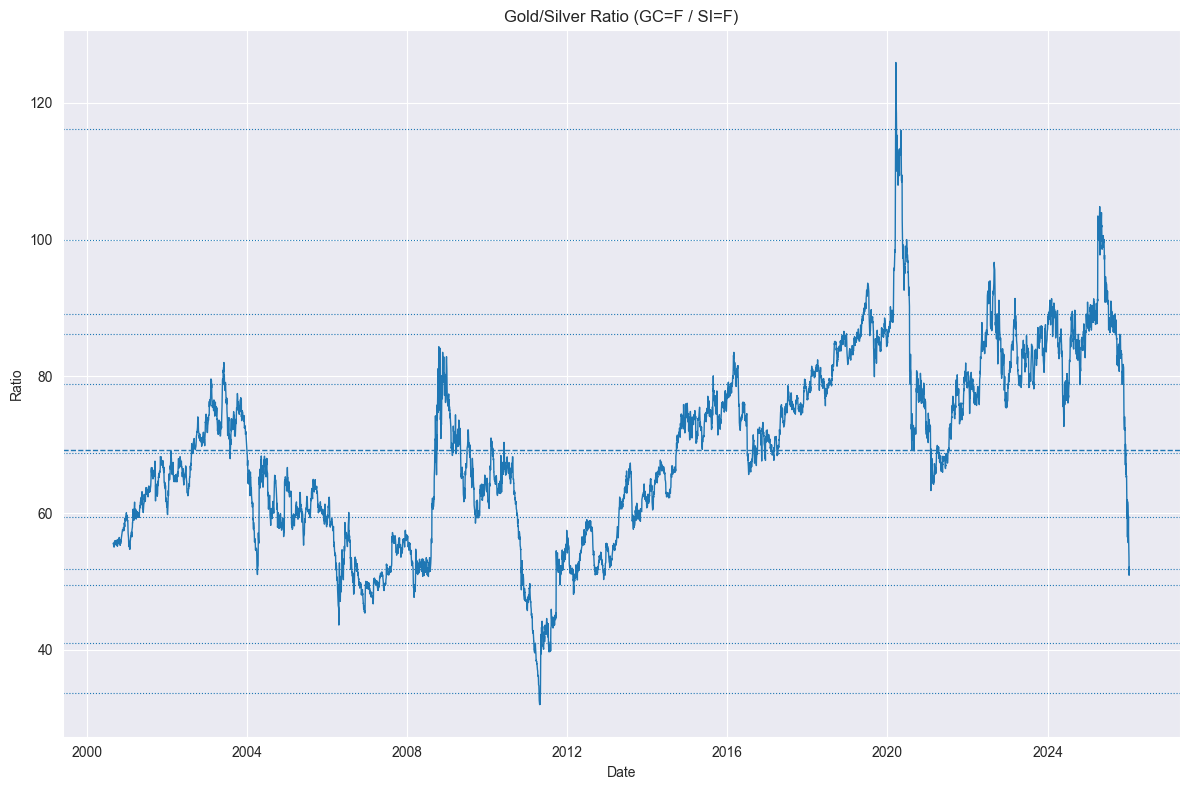

Sample start: 2000-08-30  end: 2026-01-15
Mean ratio: 69.2463
Selected percentiles:
  p0.10: 33.7283
  p1.00: 41.0404
  p5.00: 49.4337
  p10.00: 51.8887
  p25.00: 59.4366
  p50.00: 68.8320
  p75.00: 78.8488
  p90.00: 86.2224
  p95.00: 89.0887
  p99.00: 100.0035
  p99.90: 116.1947


In [94]:

# ----------------------------
# 2) Plot history + mean + some percentile lines
# ----------------------------
mean_ratio = ratio.mean()

# example percentile lines you might care about
pcts_to_show = [0.1, 1, 5, 10, 25, 50, 75, 90, 95, 99, 99.9]
pct_vals = {p: ratio.quantile(p/100) for p in pcts_to_show}

plt.figure(figsize=(12, 8))
plt.plot(ratio.index, ratio.values, linewidth=1)
plt.axhline(mean_ratio, linestyle="--", linewidth=1)

for p, v in pct_vals.items():
    plt.axhline(v, linestyle=":", linewidth=0.8)

plt.title("Gold/Silver Ratio (GC=F / SI=F)")
plt.ylabel("Ratio")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

print(f"Sample start: {ratio.index.min().date()}  end: {ratio.index.max().date()}")
print(f"Mean ratio: {mean_ratio:.4f}")
print("Selected percentiles:")
for p in pcts_to_show:
    print(f"  p{p:.2f}: {pct_vals[p]:.4f}")

In [95]:
gold_m = pd.read_csv('/Users/henrywzh/Desktop/Data/Gold Historical Data.csv')
silver_m = pd.read_csv('/Users/henrywzh/Desktop/Data/Silver Historical Data.csv')
silver_m.set_index("Date", inplace=True)
gold_m.set_index("Date", inplace=True)
gold_m.index = pd.to_datetime(gold_m.index, format="%d/%m/%Y")
silver_m.index = pd.to_datetime(silver_m.index, format="%d/%m/%Y")

In [96]:
gold_silver_m = pd.DataFrame(silver_m['Price'].astype(float)).merge(gold_m['Price'].str.replace(',', '').astype(float), how='inner', left_index=True, right_index=True, suffixes=('_Silver', '_Gold'))
ratio_m = gold_silver_m['Price_Gold'] / gold_silver_m['Price_Silver']

ratio_m

Date
1975-02-01    40.531561
1975-03-01    41.426264
1975-04-01    38.213058
1975-05-01    37.134696
1975-06-01    35.893048
                ...    
2025-08-01    87.134328
2025-09-01    82.682948
2025-10-01    82.630896
2025-11-01    74.434512
2025-12-01    61.457628
Length: 611, dtype: float64

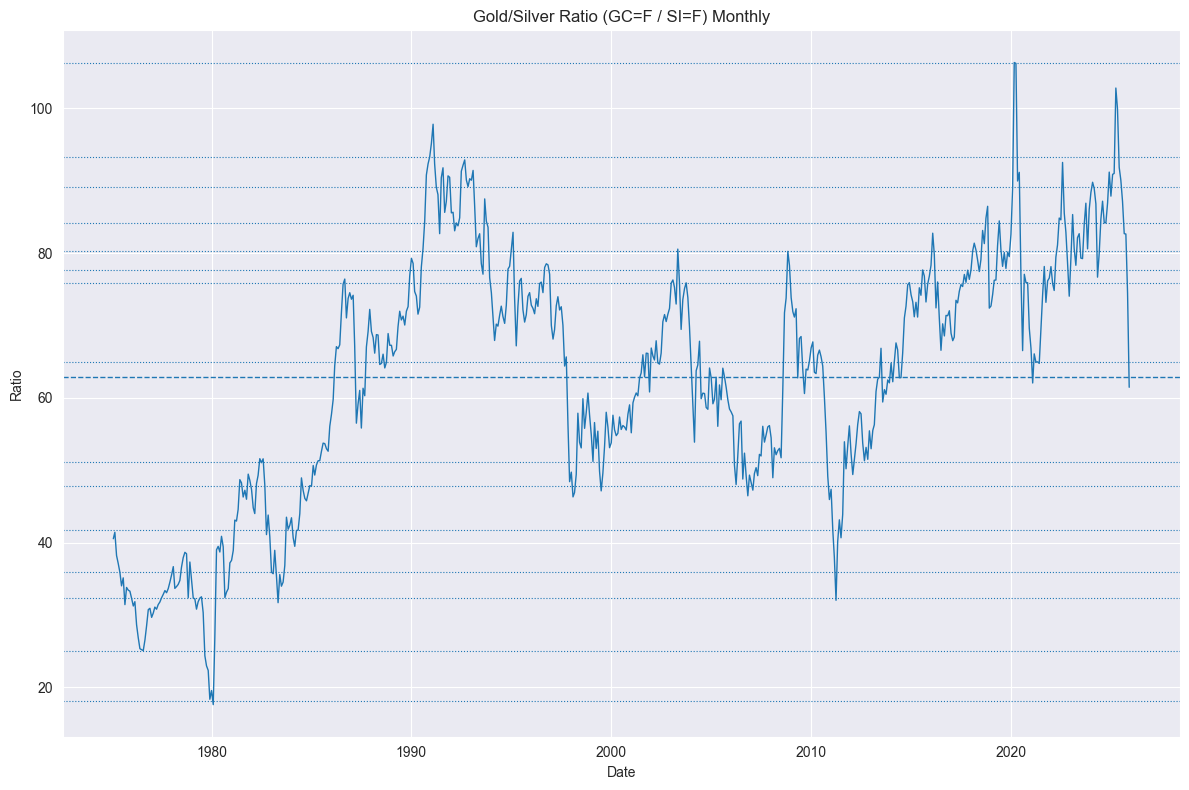

Sample start: 1975-02-01  end: 2025-12-01
Mean ratio: 62.8151
Selected percentiles:
  p0.10: 18.0628
  p1.00: 25.0800
  p5.00: 32.2778
  p10.00: 35.8930
  p15.00: 41.7005
  p20.00: 47.8671
  p25.00: 51.1244
  p50.00: 64.9697
  p75.00: 75.8212
  p80.00: 77.6696
  p85.00: 80.2783
  p90.00: 84.1725
  p95.00: 89.1752
  p99.00: 93.2481
  p99.90: 106.2490


In [97]:
mean_ratio_m = ratio_m.mean()

# example percentile lines you might care about
pcts_to_show_m = [0.1, 1, 5, 10, 15, 20, 25, 50, 75, 80, 85, 90, 95, 99, 99.9]
pct_vals_m = {p: ratio_m.quantile(p/100) for p in pcts_to_show_m}

plt.figure(figsize=(12, 8))
plt.plot(ratio_m.index, ratio_m.values, linewidth=1)
plt.axhline(mean_ratio_m, linestyle="--", linewidth=1)

for p, v in pct_vals_m.items():
    plt.axhline(v, linestyle=":", linewidth=0.8)

plt.title("Gold/Silver Ratio (GC=F / SI=F) Monthly")
plt.ylabel("Ratio")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

print(f"Sample start: {ratio_m.index.min().date()}  end: {ratio_m.index.max().date()}")
print(f"Mean ratio: {mean_ratio_m:.4f}")
print("Selected percentiles:")
for p in pcts_to_show_m:
    print(f"  p{p:.2f}: {pct_vals_m[p]:.4f}")

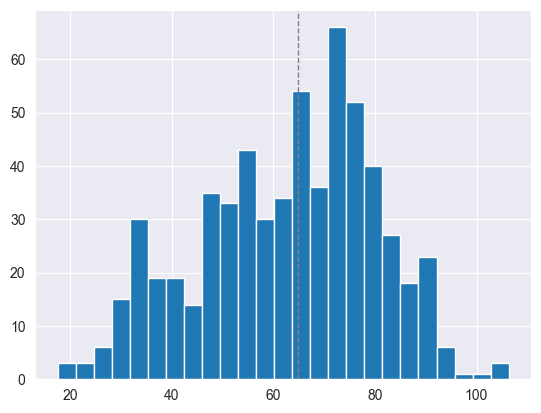

In [103]:
plt.hist(ratio_m, bins=25)
plt.axvline(ratio_m.median(), linestyle="--", linewidth=1, color='gray')
plt.show()

In [104]:

# ----------------------------
# 3) Estimate days to reach x percentile (based on recent silver rally pace)
# ----------------------------

def find_recent_rally_start(series: pd.Series, lookback=252):
    """
    一个“无需主观画线”的近似：在最近 lookback 天内，取 silver 的最低点作为这轮行情起点。
    你也可以不用它，直接用固定 window。
    """
    s = series.dropna()
    if len(s) < 10:
        return s.index.min()
    s_lb = s.iloc[-lookback:]
    return s_lb.idxmin()

def estimate_days_to_target_ratio(
    px_gold: pd.Series,
    px_silver: pd.Series,
    ratio_series: pd.Series,
    target_ratio: float,
    method: str = "relative_drift",   # "relative_drift" or "silver_only"
    window: int = 20,
    use_rally_low_start: bool = False,
    rally_lookback: int = 252,
):
    """
    返回到达 target_ratio 需要的交易日数（基于最近漂移外推）。
    若最近漂移方向与目标相反，days_est=None，并解释原因。
    """
    R0 = float(ratio_series.dropna().iloc[-1])
    R_star = float(target_ratio)

    # 已到达则直接返回 0
    # 这里按“数值层面”判断（不考虑越过后的回归）
    if (R_star <= R0 and R_star >= R0) or (R_star >= R0 and R_star <= R0):
        pass  # 这行没意义，只是占位

    if np.isclose(R_star, R0, rtol=1e-8, atol=1e-12):
        return {"current_ratio": R0, "target_ratio": R_star, "days_est": 0, "drift_per_day": None, "note": "Already at target."}

    # 选择估计区间
    if use_rally_low_start:
        start_dt = find_recent_rally_start(px_silver, lookback=rally_lookback)
        g = px_gold.loc[start_dt:].dropna()
        s = px_silver.loc[start_dt:].dropna()
        df = pd.concat([g, s], axis=1, join="inner")
    else:
        df = pd.concat([px_gold, px_silver], axis=1, join="inner").dropna().iloc[-(window+1):]

    df.columns = ["gold", "silver"]
    lg = np.log(df["gold"]).diff().dropna()
    ls = np.log(df["silver"]).diff().dropna()

    mu_g = float(lg.mean())
    mu_s = float(ls.mean())

    if method == "relative_drift":
        drift = mu_g - mu_s
    elif method == "silver_only":
        drift = -mu_s
    else:
        raise ValueError("method must be 'relative_drift' or 'silver_only'")

    # 方向检查：ratio 预测 R(d)=R0*exp(drift*d)
    need_down = R_star < R0
    if need_down and drift >= 0:
        return {
            "current_ratio": R0,
            "target_ratio": R_star,
            "days_est": None,
            "drift_per_day": drift,
            "note": "Recent drift >= 0, so ratio is not trending downward toward target."
        }
    if (not need_down) and drift <= 0:
        return {
            "current_ratio": R0,
            "target_ratio": R_star,
            "days_est": None,
            "drift_per_day": drift,
            "note": "Recent drift <= 0, so ratio is not trending upward toward target."
        }

    days = (np.log(R_star) - np.log(R0)) / drift
    return {
        "current_ratio": R0,
        "target_ratio": R_star,
        "days_est": float(days),
        "drift_per_day": drift,
        "note": f"Method={method}, window={'rally_low' if use_rally_low_start else window}."
    }

def estimate_days_to_percentile(
    px_gold: pd.Series,
    px_silver: pd.Series,
    ratio_series: pd.Series,
    target_percentile: float,
    method: str = "relative_drift",
    window: int = 20,
    use_rally_low_start: bool = False,
    rally_lookback: int = 252,
):
    """
    估算“还要多少个交易日”让 ratio 到达 target_percentile 分位对应的水平。

    method:
      - "relative_drift": 用最近窗口的(日对数收益) (mu_gold - mu_silver) 来外推 ratio 漂移（推荐）
      - "silver_only": 假设 gold 不动，仅按 silver 最近涨幅速度推动 ratio 下降（更激进/偏乐观）

    window:
      - 如果 use_rally_low_start=False: 取最近 window 天估计漂移
      - 如果 use_rally_low_start=True : 从“这轮行情起点(最近lookback内银价最低点)”到现在估计漂移
    """
    target = ratio_series.quantile(target_percentile/100)
    r0 = ratio_series.iloc[-1]

    # 如果已经达到/越过目标分位的“数值水平”，直接返回 0 天
    # 注意：银强通常意味着 ratio 下降；所以常见目标是更低的分位（比如 10%/5%）
    if (r0 <= target and target_percentile <= 50) or (r0 >= target and target_percentile >= 50):
        return {
            "target_ratio": float(target),
            "current_ratio": float(r0),
            "days_est": 0,
            "drift_per_day": None,
            "note": "Already at/through target level."
        }

    # 选择用于估计“最近这轮”的区间
    if use_rally_low_start:
        start_dt = find_recent_rally_start(px_silver, lookback=rally_lookback)
        g = px_gold.loc[start_dt:].dropna()
        s = px_silver.loc[start_dt:].dropna()
        df = pd.concat([g, s], axis=1, join="inner")
    else:
        df = pd.concat([px_gold, px_silver], axis=1, join="inner").dropna().iloc[-(window+1):]

    df.columns = ["gold", "silver"]

    lg = np.log(df["gold"]).diff().dropna()
    ls = np.log(df["silver"]).diff().dropna()

    mu_g = lg.mean()
    mu_s = ls.mean()

    if method == "relative_drift":
        drift = mu_g - mu_s  # ratio 的对数漂移
    elif method == "silver_only":
        drift = -mu_s        # gold 视为 0 漂移
    else:
        raise ValueError("method must be 'relative_drift' or 'silver_only'")

    # 方向检查：是否在朝目标移动？
    # ratio forecast: r(d)=r0*exp(drift*d)
    # 若 target < r0，需要 drift < 0；若 target > r0，需要 drift > 0
    need_down = target < r0
    if need_down and drift >= 0:
        return {
            "target_ratio": float(target),
            "current_ratio": float(r0),
            "days_est": None,
            "drift_per_day": float(drift),
            "note": "Recent drift does NOT move ratio down toward target (drift >= 0)."
        }
    if (not need_down) and drift <= 0:
        return {
            "target_ratio": float(target),
            "current_ratio": float(r0),
            "days_est": None,
            "drift_per_day": float(drift),
            "note": "Recent drift does NOT move ratio up toward target (drift <= 0)."
        }

    days = (np.log(target) - np.log(r0)) / drift
    return {
        "target_ratio": float(target),
        "current_ratio": float(r0),
        "days_est": float(days),
        "drift_per_day": float(drift),
        "note": f"Method={method}, window={'rally_low' if use_rally_low_start else window}."
    }


In [105]:
def days_to_target_from_window(px_gold, px_silver, ratio, target_ratio, window, method="relative_drift"):
    df = pd.concat([px_gold, px_silver], axis=1, join="inner").dropna()
    df.columns = ["gold", "silver"]
    df = df.iloc[-(window+1):]
    if len(df) < window + 1:
        return None

    lg = np.log(df["gold"]).diff().dropna()
    ls = np.log(df["silver"]).diff().dropna()

    mu_g = float(lg.mean())
    mu_s = float(ls.mean())

    if method == "relative_drift":
        drift = mu_g - mu_s
    elif method == "silver_only":
        drift = -mu_s
    else:
        raise ValueError("method must be 'relative_drift' or 'silver_only'")

    R0 = float(ratio.dropna().iloc[-1])
    R_star = float(target_ratio)

    # 方向检查
    need_down = R_star < R0
    if need_down and drift >= 0:
        return {"window": window, "drift": drift, "days": None, "note": "drift>=0, ratio not moving down"}
    if (not need_down) and drift <= 0:
        return {"window": window, "drift": drift, "days": None, "note": "drift<=0, ratio not moving up"}

    days = (np.log(R_star) - np.log(R0)) / drift
    return {"window": window, "drift": drift, "days": float(days), "note": ""}

def scan_windows_since_date(px_gold, px_silver, ratio, target_ratio, start_date="2025-11-01",
                            windows=(20,25,30,40,50,60), method="relative_drift"):
    df = pd.concat([px_gold, px_silver, ratio], axis=1, join="inner").dropna()
    df.columns = ["gold","silver","ratio"]
    df = df.loc[start_date:]  # 只看这轮行情

    out = []
    for w in windows:
        res = days_to_target_from_window(df["gold"], df["silver"], df["ratio"], target_ratio, w, method=method)
        if res is not None:
            out.append(res)

    out_df = pd.DataFrame(out).sort_values("window")
    # 给你一个更可读的 summary：忽略 days=None 的情况
    valid = out_df["days"].dropna()
    summary = {
        "start_date": start_date,
        "method": method,
        "n_windows": len(out_df),
        "days_median": float(valid.median()) if len(valid) else None,
        "days_p25": float(valid.quantile(0.25)) if len(valid) else None,
        "days_p75": float(valid.quantile(0.75)) if len(valid) else None,
    }
    return out_df, summary

# 用法示例：
target_ratio = 40  # 你想要的目标金银比
out_df, summary = scan_windows_since_date(px["gold"], px["silver"], ratio, target_ratio, start_date="2025-11-01")
print(out_df)
print(summary)


   window     drift       days note
0      20 -0.013779  19.203196     
1      25 -0.011752  22.515238     
2      30 -0.010867  24.348272     
3      40 -0.010826  24.440008     
4      50 -0.009436  28.042412     
{'start_date': '2025-11-01', 'method': 'relative_drift', 'n_windows': 5, 'days_median': 24.348271714323225, 'days_p25': 22.515238381763776, 'days_p75': 24.440008184583366}


In [106]:
res = estimate_days_to_target_ratio(
    px_gold=px["gold"],
    px_silver=px["silver"],
    ratio_series=ratio,
    target_ratio=40,          # 你要的目标金银比
    method="relative_drift",  # 推荐
    window=50                 # 最近 20 个交易日的“速度”
)
print(res)


{'current_ratio': 52.11629188293249, 'target_ratio': 40.0, 'days_est': 28.042411814510025, 'drift_per_day': -0.009435641684490789, 'note': 'Method=relative_drift, window=50.'}


In [107]:
res = estimate_days_to_percentile(
    px_gold=px["gold"],
    px_silver=px["silver"],
    ratio_series=ratio,
    target_percentile=0.1,          # 你要的目标金银比
    method="relative_drift",  # 推荐
    window=50                 # 最近 20 个交易日的“速度”
)
print(res)


{'target_ratio': 33.728320150119636, 'current_ratio': 52.11629188293249, 'days_est': 46.1166048398218, 'drift_per_day': -0.009435641684490789, 'note': 'Method=relative_drift, window=50.'}


In [133]:
import statsmodels.api as sm

def fit_piecewise_linear_scan(ratio: pd.Series, start=None, min_seg=30):
    r = ratio.dropna()
    if start: r = r.loc[start:]
    y = np.log(r).values
    n = len(y)
    t = np.arange(n, dtype=float)

    best = None
    for tau in range(min_seg, n-min_seg):
        # segment 1
        X1 = sm.add_constant(t[:tau])
        m1 = sm.OLS(y[:tau], X1).fit()
        sse1 = np.sum(m1.resid**2)

        # segment 2
        X2 = sm.add_constant(t[tau:])
        m2 = sm.OLS(y[tau:], X2).fit()
        sse2 = np.sum(m2.resid**2)

        sse = sse1 + sse2
        if (best is None) or (sse < best["sse"]):
            best = {"tau": tau, "sse": sse, "m1": m1, "m2": m2}

    # map tau back to date
    tau_date = r.index[best["tau"]]
    return best["m1"], best["m2"], tau_date, best["sse"]


m1_seg, m2_seg, break_date, sse = fit_piecewise_linear_scan(ratio, start="2025-07-15")
print("Best break date:", break_date)
print("Segment1 slope:", m1_seg.params[1], "Segment2 slope:", m2_seg.params[1])


Best break date: 2025-11-26 00:00:00
Segment1 slope: -0.001064456011773508 Segment2 slope: -0.011239276019193327


In [144]:
def seg_summary(m):
    return {
        "params": m.params.tolist(),
        "rsq": float(m.rsquared),
        "sse": float(np.sum(m.resid**2)),
        "resid_std": float(np.std(m.resid, ddof=1)),
        "n": int(m.nobs)
    }

print("break_date:", break_date)
print("seg1:", seg_summary(m1_seg))
print("seg2:", seg_summary(m2_seg))

def oos_ols_logR(ratio: pd.Series, train_end: str, start: str = "2025-11-26"):
    r = ratio.dropna().loc[start:]
    y = np.log(r)

    y_train = y.loc[:train_end]
    y_test  = y.loc[pd.Timestamp(train_end) + pd.Timedelta(days=1):]

    # time index in "days since start"
    t_all = np.arange(len(y), dtype=float)
    t = pd.Series(t_all, index=y.index)

    X_train = sm.add_constant(t.loc[y_train.index].values)
    X_test  = sm.add_constant(t.loc[y_test.index].values)

    m = sm.OLS(y_train.values, X_train).fit()
    yhat = m.predict(X_test)

    # RMSE
    rmse = float(np.sqrt(np.mean((y_test.values - yhat)**2)))

    # naive baseline: predict y_t = y_{t-1} (random walk in log space)
    y_naive = y_test.shift(1).dropna()
    rmse_naive = float(np.sqrt(np.mean((y_naive.values - y_test.loc[y_naive.index].values)**2)))

    return {"rmse_model": rmse, "rmse_naive": rmse_naive, "params": m.params.tolist(), "n_train": len(y_train), "n_test": len(y_test)}

# Example:
run1 = oos_ols_logR(ratio, train_end="2025-12-31", start="2025-11-26")
run2 = oos_ols_logR(ratio, train_end="2026-01-06", start="2025-11-26")
print(run1)
print(run2)

break_date: 2025-11-26 00:00:00
seg1: {'params': [4.49650725930141, -0.001064456011773508], 'rsq': 0.7085139464026041, 'sse': 0.033301689035584225, 'resid_std': 0.01882214885746572, 'n': 95}
seg2: {'params': [5.4132585550199, -0.011239276019193327], 'rsq': 0.9396359274083205, 'sse': 0.026556769733334946, 'resid_std': 0.028368126444653457, 'n': 34}
{'rmse_model': 0.0352118610301611, 'rmse_naive': 0.03946378612926095, 'params': [4.3391882635952195, -0.010643261023757199], 'n_train': 24, 'n_test': 10}
{'rmse_model': 0.03531090992129008, 'rmse_naive': 0.037222552304024416, 'params': [4.341043494730011, -0.01084851127816621], 'n_train': 27, 'n_test': 7}


In [146]:
from scipy.stats import norm

def days_to_target_range(R0, R_star, oos_runs, ps=(0.1,0.25,0.5,0.75,0.9)):
    b = np.mean([d["params"][1] for d in oos_runs])         # slope
    sigma = np.mean([d["rmse_model"] for d in oos_runs])    # log RMSE
    dy = np.log(R_star / R0)

    out = {}
    for p in ps:
        z = norm.ppf(p)
        t = (dy - z*sigma) / b
        out[p] = float(t)
    return {"b_avg": float(b), "sigma_avg": float(sigma), "t_by_p": out}

oos_runs = [run1, run2]

res = days_to_target_range(R0=52, R_star=40, oos_runs=oos_runs)
res

{'b_avg': -0.010745886150961705,
 'sigma_avg': 0.03526138547572559,
 't_by_p': {0.1: 20.210057845100764,
  0.25: 22.202061145515607,
  0.5: 24.415321433868968,
  0.75: 26.628581722222325,
  0.9: 28.620585022637172}}

In [147]:
def mc_hitting_time_with_break(
    R0, R_star,
    b_fast=-0.01075,
    b_after=0.0,            # after break: 0 (flat) or +0.002 (reversal) or -0.001 (slow)
    sigma=0.0353,
    p_break_per_day=0.01,   # 1% per day break probability
    n_sims=50000,
    max_days=252,
    seed=0
):
    rng = np.random.default_rng(seed)
    y0 = np.log(R0)
    y_star = np.log(R_star)

    hit = np.full(n_sims, np.nan)

    for i in range(n_sims):
        y = y0
        b = b_fast
        broken = False
        for d in range(1, max_days+1):
            if (not broken) and (rng.random() < p_break_per_day):
                b = b_after
                broken = True

            y = y + b + rng.normal(0, sigma)

            if y <= y_star:
                hit[i] = d
                break

    s = pd.Series(hit).dropna()
    return {
        "hit_rate": float(s.size / n_sims),
        "p10": float(s.quantile(0.10)) if s.size else None,
        "p50": float(s.quantile(0.50)) if s.size else None,
        "p90": float(s.quantile(0.90)) if s.size else None,
        "mean": float(s.mean()) if s.size else None,
    }

mc_hitting_time_with_break(R0=52, R_star=40)

{'hit_rate': 0.93544,
 'p10': 11.0,
 'p50': 23.0,
 'p90': 59.0,
 'mean': 32.27266313178825}

In [153]:
def daily_oos_monitor(ratio: pd.Series, start="2025-11-26", min_train=20):
    r = ratio.dropna().loc[start:]
    y = np.log(r)

    # time index (0..n-1)
    t_all = np.arange(len(y), dtype=float)
    t = pd.Series(t_all, index=y.index)

    rows = []
    for i in range(min_train, len(y)):
        # train on [0, ..., i-1], predict i (one-step ahead)
        train_idx = y.index[:i]
        test_idx = y.index[i]

        y_train = y.loc[train_idx].values
        t_train = t.loc[train_idx].values

        # X_train: (n,2) with const + t
        X_train = sm.add_constant(t_train.reshape(-1, 1), has_constant="add")
        m = sm.OLS(y_train, X_train).fit()

        # X_test: (1,2) with const + t
        t_test = np.array([[t.loc[test_idx]]])  # shape (1,1)
        X_test = sm.add_constant(t_test, has_constant="add")

        yhat = float(m.predict(X_test)[0])
        ytrue = float(y.loc[test_idx])

        err_model = ytrue - yhat

        # random walk baseline: yhat = y_{t-1}
        yhat_rw = float(y.loc[y.index[i-1]])
        err_rw = ytrue - yhat_rw

        rows.append({
            "date": test_idx,
            "ytrue": ytrue,
            "yhat_model": yhat,
            "err_model": err_model,
            "yhat_rw": yhat_rw,
            "err_rw": err_rw,
            "slope_b": float(m.params[1]),
            "slope_t": float(m.tvalues[1]),
            "n_train": int(len(train_idx)),
        })

    df = pd.DataFrame(rows).set_index("date")

    # rolling RMSE
    for w in [10, 20]:
        df[f"rmse_model_{w}"] = df["err_model"].rolling(w).apply(lambda x: np.sqrt(np.mean(x**2)), raw=True)
        df[f"rmse_rw_{w}"] = df["err_rw"].rolling(w).apply(lambda x: np.sqrt(np.mean(x**2)), raw=True)

    df["model_beats_rw_20"] = df["rmse_model_20"] < df["rmse_rw_20"]
    df["model_beats_rw_10"] = df["rmse_model_10"] < df["rmse_rw_10"]
    
    df["trend_alive"] = (df["slope_b"] < 0) & (df["slope_t"] < -2)
    
    # Use 20-day when available, otherwise fallback to 10-day
    df["healthy"] = np.where(
        df["rmse_model_20"].notna() & df["rmse_rw_20"].notna(),
        df["model_beats_rw_20"] & df["trend_alive"],
        df["model_beats_rw_10"] & df["trend_alive"]
    )

    return df

# Usage:
monitor = daily_oos_monitor(ratio, start="2025-11-15", min_train=20)
print(monitor.tail(10)[["slope_b","slope_t","rmse_model_20","rmse_rw_20","healthy"]])

             slope_b    slope_t  rmse_model_20  rmse_rw_20  healthy
date                                                               
2026-01-02 -0.010878 -19.985158            NaN         NaN     True
2026-01-05 -0.010703 -20.578290            NaN         NaN     True
2026-01-06 -0.010760 -21.974206            NaN         NaN     True
2026-01-07 -0.010984 -22.952313            NaN         NaN     True
2026-01-08 -0.010948 -24.242021            NaN         NaN     True
2026-01-09 -0.010725 -24.074674            NaN         NaN     True
2026-01-12 -0.010684 -25.311980            NaN         NaN     True
2026-01-13 -0.010788 -26.681372            NaN         NaN     True
2026-01-14 -0.010904 -27.999712       0.033995    0.044746     True
2026-01-15 -0.011142 -28.239085       0.033988    0.045045     True


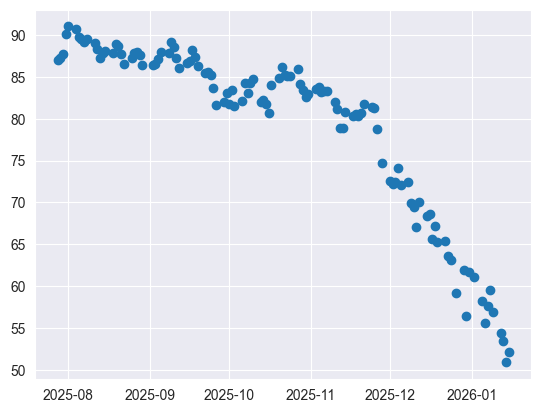

In [131]:
plt.scatter(ratio.tail(120).index, ratio.tail(120).values)

In [168]:
def build_change_alerts(
    monitor: pd.DataFrame,
    t_thresh: float = -2.0,
    k_slope: int = 5,
    slope_jump_thresh: float = 0.003,   # tune
    shock_z: float = 3.0,
    rmse_col: str = "rmse_model_20",     # fallback to rmse_model_10 if needed
):
    df = monitor.copy()

    # Define "trend alive" (your current trend regime)
    df["trend_alive"] = (df["slope_b"] < 0) & (df["slope_t"] < t_thresh)

    # 1) Trend flip (start/end of strong trend)
    df["trend_alive_prev"] = df["trend_alive"].shift(1)
    df["alert_trend_flip"] = (df["trend_alive"] != df["trend_alive_prev"]) & df["trend_alive_prev"].notna()

    # 2) Slope jump (acceleration/deceleration)
    df["delta_b"] = df["slope_b"] - df["slope_b"].shift(k_slope)
    df["alert_slope_jump"] = df["delta_b"].abs() > slope_jump_thresh

    # 3) Residual shock (break / dislocation)
    df["alert_shock"] = False
    if rmse_col in df.columns:
        ok = df[rmse_col].notna()
        df.loc[ok, "alert_shock"] = df.loc[ok, "err_model"].abs() > shock_z * df.loc[ok, rmse_col]

    # Combine
    df["alert_any"] = df["alert_trend_flip"] | df["alert_slope_jump"] | df["alert_shock"]
    return df

def score_alerts(
    alerts_df: pd.DataFrame,
    labeled_events: list[dict],
    alert_col: str = "alert_any",
    tol_days: int = 7,         # within +/- 7 calendar days counts as caught
    cooldown_days: int = 7     # collapse alerts closer than this
):
    # 1) collect alert dates
    alert_dates = alerts_df.index[alerts_df[alert_col]].to_list()

    # 2) collapse into episodes
    collapsed = []
    last = None
    for d in alert_dates:
        if last is None or (d - last).days > cooldown_days:
            collapsed.append(d)
            last = d
    collapsed = pd.to_datetime(collapsed)

    # 3) match to labeled events
    events = [(pd.Timestamp(e["date"]), e.get("type","event")) for e in labeled_events]
    events.sort(key=lambda x: x[0])

    used_alerts = set()
    matches = []
    delays = []

    for ev_date, ev_type in events:
        lo = ev_date - pd.Timedelta(days=tol_days)
        hi = ev_date + pd.Timedelta(days=tol_days)
        candidates = [a for a in collapsed if (lo <= a <= hi) and (a not in used_alerts)]
        if candidates:
            a0 = min(candidates)
            used_alerts.add(a0)
            delay = (a0 - ev_date).days  # negative = early, positive = late
            matches.append({"event_date": ev_date, "event_type": ev_type, "alert_date": a0, "delay_days": delay})
            delays.append(delay)

    tp = len(matches)
    fn = len(events) - tp
    fp = len([a for a in collapsed if a not in used_alerts])

    report = {
        "tol_days": tol_days,
        "cooldown_days": cooldown_days,
        "n_events": len(events),
        "n_alert_episodes": len(collapsed),
        "TP": tp,
        "FN": fn,
        "FP": fp,
        "precision": tp/(tp+fp) if (tp+fp) else np.nan,
        "recall": tp/(tp+fn) if (tp+fn) else np.nan,
        "avg_delay_days": float(np.mean(delays)) if delays else np.nan,
        "matches": matches,
    }
    return report

def score_alerts(
    alerts_df: pd.DataFrame,
    labeled_events: list[dict],
    alert_col: str = "alert_any",
    tol_days: int = 7,         # within +/- 7 calendar days counts as caught
    cooldown_days: int = 7     # collapse alerts closer than this
):
    # 1) collect alert dates
    alert_dates = alerts_df.index[alerts_df[alert_col]].to_list()

    # 2) collapse into episodes
    collapsed = []
    last = None
    for d in alert_dates:
        if last is None or (d - last).days > cooldown_days:
            collapsed.append(d)
            last = d
    collapsed = pd.to_datetime(collapsed)

    # 3) match to labeled events
    events = [(pd.Timestamp(e["date"]), e.get("type","event")) for e in labeled_events]
    events.sort(key=lambda x: x[0])

    used_alerts = set()
    matches = []
    delays = []

    for ev_date, ev_type in events:
        lo = ev_date - pd.Timedelta(days=tol_days)
        hi = ev_date + pd.Timedelta(days=tol_days)
        candidates = [a for a in collapsed if (lo <= a <= hi) and (a not in used_alerts)]
        if candidates:
            a0 = min(candidates)
            used_alerts.add(a0)
            delay = (a0 - ev_date).days  # negative = early, positive = late
            matches.append({"event_date": ev_date, "event_type": ev_type, "alert_date": a0, "delay_days": delay})
            delays.append(delay)

    tp = len(matches)
    fn = len(events) - tp
    fp = len([a for a in collapsed if a not in used_alerts])

    report = {
        "tol_days": tol_days,
        "cooldown_days": cooldown_days,
        "n_events": len(events),
        "n_alert_episodes": len(collapsed),
        "TP": tp,
        "FN": fn,
        "FP": fp,
        "precision": tp/(tp+fp) if (tp+fp) else np.nan,
        "recall": tp/(tp+fn) if (tp+fn) else np.nan,
        "avg_delay_days": float(np.mean(delays)) if delays else np.nan,
        "matches": matches,
    }
    return report

def grid_search_thresholds(monitor, labeled_events, jump_grid, shock_grid, tol_days=7):
    best = None
    for j in jump_grid:
        for z in shock_grid:
            df = build_change_alerts(monitor, slope_jump_thresh=j, shock_z=z, rmse_col="rmse_model_20")
            rep = score_alerts(df, labeled_events, tol_days=tol_days, cooldown_days=7)
            # Example objective: maximize recall, then precision
            score = (rep["recall"], rep["precision"])
            if best is None or score > best["score"]:
                best = {"score": score, "jump": j, "shock_z": z, "report": rep}
    return best


def daily_monitor_with_pi(
    ratio: pd.Series,
    start: str = "2025-11-15",
    train_window: int = 60,
    alpha: float = 0.05,          # 95% PI
):
    """
    Rolling-window OLS on log(ratio), 1-step-ahead prediction with prediction interval.
    Returns df with ytrue, yhat, PI bounds, residuals, z-scores.
    """
    r = ratio.dropna().loc[start:]
    y = np.log(r)
    idx = y.index
    n = len(y)

    rows = []
    # predict next day i using data up to i-1
    for i in range(train_window, n):
        y_train = y.iloc[i-train_window:i].values
        t_train = np.arange(train_window, dtype=float).reshape(-1, 1)

        X_train = sm.add_constant(t_train, has_constant="add")
        m = sm.OLS(y_train, X_train).fit()

        # forecast today i with t = train_window (one step ahead from last train point)
        t_test = np.array([[train_window]], dtype=float)
        X_test = sm.add_constant(t_test, has_constant="add")

        pred = m.get_prediction(X_test)
        sf = pred.summary_frame(alpha=alpha)  # mean, mean_ci, obs_ci

        yhat = float(sf["mean"].iloc[0])
        # prediction interval (for a new observation): obs_ci_lower/upper
        lo = float(sf["obs_ci_lower"].iloc[0])
        hi = float(sf["obs_ci_upper"].iloc[0])

        ytrue = float(y.iloc[i])
        err = ytrue - yhat

        # use prediction SE for standardized residual
        # pred.se_obs is the standard error of forecast for a new obs
        se_obs = float(pred.se_obs[0])
        z = err / se_obs if se_obs > 0 else np.nan

        rows.append({
            "date": idx[i],
            "ytrue": ytrue,
            "yhat": yhat,
            "pi_low": lo,
            "pi_high": hi,
            "err": err,
            "se_obs": se_obs,
            "z": z,
            "slope_b": float(m.params[1]),
            "slope_t": float(m.tvalues[1]),
        })

    return pd.DataFrame(rows).set_index("date")


def add_break_signals(
    df: pd.DataFrame,
    m_days: int = 5,
    k_breaches: int = 3,
    z_shock: float = 2.5,
    cusum_h: float = 6.0,
):
    """
    Define 'break' if:
      - PI breaches are persistent (>=k of last m days), OR
      - standardized residual shock |z|>z_shock, OR
      - CUSUM of z crosses threshold (persistent bias)

    Returns df with breach flags + break flags.
    """
    out = df.copy()

    # 1) PI breach
    out["breach"] = (out["ytrue"] < out["pi_low"]) | (out["ytrue"] > out["pi_high"])
    out["breach_count_m"] = out["breach"].rolling(m_days).sum()
    out["break_breach_persistent"] = out["breach_count_m"] >= k_breaches

    # 2) shock
    out["break_shock"] = out["z"].abs() > z_shock

    # 3) CUSUM on z (two-sided)
    # Detect sustained bias: cumulative sum of z
    z = out["z"].fillna(0.0).values
    cusum_pos = np.zeros_like(z, dtype=float)
    cusum_neg = np.zeros_like(z, dtype=float)
    for i in range(1, len(z)):
        cusum_pos[i] = max(0.0, cusum_pos[i-1] + z[i])
        cusum_neg[i] = min(0.0, cusum_neg[i-1] + z[i])
    out["cusum_pos"] = cusum_pos
    out["cusum_neg"] = cusum_neg
    out["break_cusum"] = (out["cusum_pos"] > cusum_h) | (out["cusum_neg"] < -cusum_h)

    # Combine
    out["break_any"] = out["break_breach_persistent"] | out["break_shock"] | out["break_cusum"]
    return out


labeled_events = [
    {"date": "2025-11-26", "type": "trend_accelerates_down"},
    {'date': '2010-08-09', 'type': '2011_白银暴涨'},
    {'date': '2008-07-21', 'type': '2008_trend_up'},
    {'date': '2003-10-20', 'type': '2003_trend_down'},
    {'date': '2020-03-16', 'type': '2020_covid_trend_down'},
    {'date': '2020-02-01', 'type': '2020_covid_trend_up'},
]

best = grid_search_thresholds(
    monitor, labeled_events,
    jump_grid=[0.002, 0.003, 0.004, 0.006],
    shock_grid=[2.5, 3.0, 3.5, 4.0],
    tol_days=7
)
print(best["jump"], best["shock_z"], best["report"]["precision"], best["report"]["recall"])
print(pd.DataFrame(best["report"]["matches"]))

mon_pi = daily_monitor_with_pi(ratio, start="2000-08-30", train_window=60, alpha=0.05)
mon_break = add_break_signals(mon_pi, m_days=5, k_breaches=3, z_shock=2.5, cusum_h=6.0)

print(mon_break.tail(20)[["ytrue","yhat","pi_low","pi_high","breach","breach_count_m","z","cusum_pos","cusum_neg","break_any"]])


0.002 2.5 nan 0.0
Empty DataFrame
Columns: []
Index: []
               ytrue      yhat    pi_low   pi_high  breach  breach_count_m  \
date                                                                         
2025-12-17  4.184117  4.289124  4.201961  4.376287    True             2.0   
2025-12-18  4.207424  4.278279  4.187144  4.369414   False             1.0   
2025-12-19  4.178172  4.269314  4.176686  4.361943   False             1.0   
2025-12-22  4.181321  4.258120  4.163534  4.352706   False             1.0   
2025-12-23  4.152603  4.246740  4.152463  4.341017   False             1.0   
2025-12-24  4.144396  4.233946  4.138940  4.328951   False             0.0   
2025-12-26  4.081171  4.221487  4.125521  4.317454    True             1.0   
2025-12-29  4.125755  4.204746  4.104979  4.304513   False             1.0   
2025-12-30  4.033890  4.192241  4.092342  4.292139    True             2.0   
2025-12-31  4.121898  4.173294  4.068773  4.277816   False             2.0   
2026-01-

In [122]:
def scan_windows_days_to_target(
    px_gold: pd.Series,
    px_silver: pd.Series,
    ratio_series: pd.Series,
    target_ratio: float,
    windows=(20, 25, 30, 40, 50, 60),
    method="relative_drift",
    use_rally_low_start=False,
    rally_lookback=252,
):
    rows = []
    for w in windows:
        res = estimate_days_to_target_ratio(
            px_gold=px_gold,
            px_silver=px_silver,
            ratio_series=ratio_series,
            target_ratio=target_ratio,
            method=method,
            window=int(w),
            use_rally_low_start=use_rally_low_start,
            rally_lookback=rally_lookback
        )
        rows.append({
            "window": w,
            "days_est": res["days_est"],
            "drift_per_day": res["drift_per_day"],
            "note": res["note"],
        })

    df = pd.DataFrame(rows).sort_values("window")

    # 只用能算出 days 的窗口来汇总
    valid = df["days_est"].dropna()
    if len(valid) == 0:
        summary = {
            "current_ratio": float(ratio_series.dropna().iloc[-1]),
            "target_ratio": float(target_ratio),
            "days_min": None, "days_p25": None, "days_median": None, "days_p75": None, "days_max": None,
            "n_valid": 0,
            "note": "No valid windows (drift direction mismatch for all)."
        }
    else:
        summary = {
            "current_ratio": float(ratio_series.dropna().iloc[-1]),
            "target_ratio": float(target_ratio),
            "days_min": float(valid.min()),
            "days_p25": float(valid.quantile(0.25)),
            "days_median": float(valid.median()),
            "days_p75": float(valid.quantile(0.75)),
            "days_max": float(valid.max()),
            "n_valid": int(valid.shape[0]),
            "note": f"method={method}, windows={list(windows)}, rally_low={use_rally_low_start}"
        }

    return df, summary

df40, sum40 = scan_windows_days_to_target(px["gold"], px["silver"], ratio, target_ratio=40,
                                         windows=(20,25,30,40,50,60),
                                         method="relative_drift",
                                         use_rally_low_start=False)
print(df40)
print(sum40)

   window   days_est  drift_per_day                               note
0      20  19.203196      -0.013779  Method=relative_drift, window=20.
1      25  22.515238      -0.011752  Method=relative_drift, window=25.
2      30  24.348272      -0.010867  Method=relative_drift, window=30.
3      40  24.440008      -0.010826  Method=relative_drift, window=40.
4      50  28.042412      -0.009436  Method=relative_drift, window=50.
5      60  32.588258      -0.008119  Method=relative_drift, window=60.
{'current_ratio': 52.11629188293249, 'target_ratio': 40.0, 'days_min': 19.20319588245155, 'days_p25': 22.97349671490364, 'days_median': 24.394139949453297, 'days_p75': 27.14181090702836, 'days_max': 32.588258257949406, 'n_valid': 6, 'note': 'method=relative_drift, windows=[20, 25, 30, 40, 50, 60], rally_low=False'}


In [123]:
df30, sum30 = scan_windows_days_to_target(px["gold"], px["silver"], ratio, target_ratio=30,
                                         windows=(20,25,30,40,50,60),
                                         method="relative_drift",
                                         use_rally_low_start=False)
print(df30)
print(sum30)

   window   days_est  drift_per_day                               note
0      20  40.081706      -0.013779  Method=relative_drift, window=20.
1      25  46.994738      -0.011752  Method=relative_drift, window=25.
2      30  50.820722      -0.010867  Method=relative_drift, window=30.
3      40  51.012198      -0.010826  Method=relative_drift, window=40.
4      50  58.531284      -0.009436  Method=relative_drift, window=50.
5      60  68.019563      -0.008119  Method=relative_drift, window=60.
{'current_ratio': 52.11629188293249, 'target_ratio': 30.0, 'days_min': 40.081706152759246, 'days_p25': 47.951234277082875, 'days_median': 50.916459702250776, 'days_p75': 56.65151237786482, 'days_max': 68.01956296863044, 'n_valid': 6, 'note': 'method=relative_drift, windows=[20, 25, 30, 40, 50, 60], rally_low=False'}
